In [1]:
!pip install torch

In [41]:
!pip install transforms

  Obtaining dependency information for transforms from https://files.pythonhosted.org/packages/07/15/9b1a41ba648851defa77180fbe6c1278bae7a164a90df81ccdfa7103a4e7/transforms-0.2.1-py3-none-any.whl.metadata


In [73]:
!pip install torchvision

  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/f9/e6/3c821e7417acd82df89e39f09156ce80d58817b5b4b1ac5453b522bc5dd4/torchvision-0.16.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.1 MB 656.4 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.1 MB 660.6 kB/s eta 0:00:02
   ------- -------------------------------- 0.2/1.1 MB 1.4 MB/s eta 0:00:01
   ----------- ---------------------------- 0.3/1.1 MB 1.6 MB/s eta 0:00:01
   ---------------- ----------------------- 0.5/1.1 MB 1.8 MB/s eta 0:00:01
   -------------------- ------------------- 0.6/1.1 MB 1.9 MB/s eta 0:00:01
   ---------------------- ----------------- 0.6/1.1 MB 2.0 MB/s eta 0:00:01
   --------------------------- ------------ 0.8/1.1 MB 2.0 MB/s eta 0:00:01
   ------------------------------

In [1]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import fftconvolve
from PIL import Image,ImageOps
import matplotlib.pyplot as plt
import scipy.fft
from scipy import signal
import math
#import pysteps as pysteps

In [2]:
conn = sqlite3.connect(
    "img_db", check_same_thread=False)

cur = conn.cursor()

In [3]:
df = pd.read_sql(f'SELECT * from aspect_data', con = conn)

In [4]:
df_new = pd.read_sql(f'select aspect_data.user_id, aspect_data.session_id, aspect_data.img1, aspect_data.img2, aspect_data.selection,aspect_data.time_taken, aspect_images.height, aspect_images.width, aspect_images.image_class from aspect_data left join aspect_images on aspect_data.img1 = aspect_images.img_id where selection <> -1;', con = conn)
df_new = df_new.groupby('image_class')
df_new.count()

user_id  session_id  img1  img2  selection  time_taken  height  \
image_class                                                                   
1                 45          45    45    45         45          45      45   
10                40          40    40    40         40          40      40   
2                 71          71    71    71         71          71      71   
3                 28          28    28    28         28          28      28   
4                 36          36    36    36         36          36      36   
5                 47          47    47    47         47          47      47   
6                 47          47    47    47         47          47      47   
7                 32          32    32    32         32          32      32   
8                 33          33    33    33         33          33      33   
9                 79          79    79    79         79          79      79   

             width  
image_class         
1               45  
10              40  
2               71  
3               28  
4               36  
5               47  
6               47  
7               32  
8               33  
9               79

In [5]:
df_2 = pd.read_sql(f'select aspect_data.user_id, aspect_data.session_id, aspect_data.img1, aspect_data.img2, aspect_data.selection,aspect_data.time_taken, aspect_images.height, aspect_images.width, aspect_images.image_class from aspect_data left join aspect_images on aspect_data.img1 = aspect_images.img_id where image_class = 2;', con = conn)

In [6]:
df_2 = df_2[df_2["selection"] != -1]
df_2 = df_2.reset_index()
df_2

index    user_id  session_id  img1  img2  selection  time_taken  height  \
0      19   <User 5>  KZBDKHN3SU   105   113        105    1.608557     350   
1      20   <User 5>  KZBDKHN3SU   107   106        106    0.851762     350   
2      41   <User 5>  5IFJ2IGY7X   118   101        101    0.923297     665   
3     205   <User 6>  5XMKXLUH3Y   120    84        120    0.521171     700   
4     206   <User 6>  5XMKXLUH3Y    88   108        108    0.634062      35   
..    ...        ...         ...   ...   ...        ...         ...     ...   
66    365  <User 24>  ATC0X3CXBK   111   114        114    2.425695     420   
67    368  <User 24>  ATC0X3CXBK    98    97         97    2.393107     350   
68    370  <User 24>  ATC0X3CXBK   116   104        116    2.658929     595   
69    371  <User 24>  ATC0X3CXBK   117   115        115    3.164020     630   
70    372  <User 24>  ATC0X3CXBK    92    88         92    3.006697     350   

    width image_class  
0     450           2  
1      50           2  
2     250           2  
3     250           2  
4     250           2  
..    ...         ...  
66    250           2  
67    275           2  
68    250           2  
69    250           2  
70    175           2  

[71 rows x 10 columns]

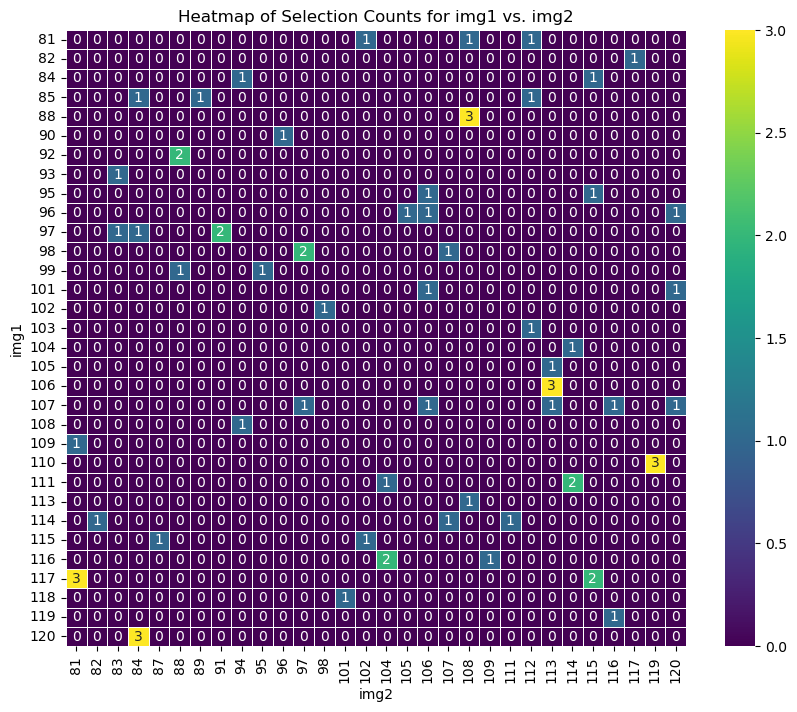

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame named df
# Replace df with the actual name of your DataFrame if different

# Pivot the DataFrame to create a matrix for the heatmap with count of selections
heatmap_data = df_2.pivot_table(index='img1', columns='img2', values='selection', aggfunc='count', fill_value=0)

# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='d', linewidths=.5)

# Set labels and title
plt.xlabel('img2')
plt.ylabel('img1')
plt.title('Heatmap of Selection Counts for img1 vs. img2')

# Show the plot
plt.show()

In [9]:
comp_dict = {}
for i in range(0, len(df_2["selection"])):
    comp_dict[df_2["img1"][i]] = 0
    comp_dict[df_2["img2"][i]] = 0
for i in range(0, len(df_2["selection"])):
    if df_2["img1"][i] == df_2["selection"][i]:
        comp_dict[df_2["img1"][i]] += 1
        comp_dict[df_2["img2"][i]] += -1
    else:
        comp_dict[df_2["img2"][i]] += 1
        comp_dict[df_2["img1"][i]] += -1

In [28]:
comp_dict

{105: 0,
 113: -2,
 107: -7,
 106: 3,
 118: -1,
 101: 3,
 120: 2,
 84: -5,
 88: -4,
 108: 2,
 117: 4,
 81: -5,
 110: 3,
 119: -4,
 116: 3,
 109: -2,
 82: -2,
 93: 1,
 83: -2,
 85: -1,
 104: -2,
 114: 2,
 95: -3,
 115: 2,
 96: 4,
 99: 2,
 103: -1,
 112: 3,
 94: 2,
 102: -1,
 111: 2,
 97: 3,
 98: 2,
 89: -1,
 87: 1,
 90: -1}

In [10]:
df_3 = pd.read_sql(f'SELECT * from aspect_images', con = conn)
df_3

img_id                                               link  height  width  \
0         1  https://res.cloudinary.com/drqnkfexf/image/upl...     105    234   
1         2  https://res.cloudinary.com/drqnkfexf/image/upl...     140    234   
2         3  https://res.cloudinary.com/drqnkfexf/image/upl...     175    234   
3         4  https://res.cloudinary.com/drqnkfexf/image/upl...     210    234   
4         5  https://res.cloudinary.com/drqnkfexf/image/upl...     245    234   
..      ...                                                ...     ...    ...   
392     393  https://res.cloudinary.com/drqnkfexf/image/upl...     421    350   
393     394  https://res.cloudinary.com/drqnkfexf/image/upl...      44    350   
394     395  https://res.cloudinary.com/drqnkfexf/image/upl...     443    350   
395     396  https://res.cloudinary.com/drqnkfexf/image/upl...      66    350   
396     397  https://res.cloudinary.com/drqnkfexf/image/upl...      88    350   

    image_class  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
392           9  
393           9  
394           9  
395           9  
396           9  

[397 rows x 5 columns]

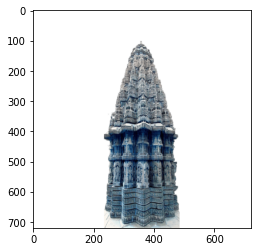

In [49]:
import requests
import cv2
from skimage import io
import matplotlib.pyplot as plt

url = df_3["link"][116]
image = io.imread(url) 
image_2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_2)

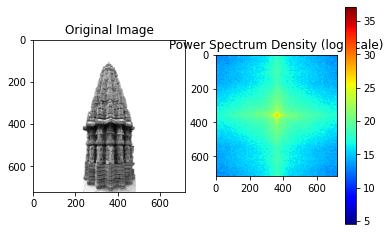

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def plot_image_psd(image_path):
    # Load the image
    img = image_path

    # Convert the image to grayscale if it's a color image
    if len(img.shape) == 3:
        img = np.mean(img, axis=-1)

    # Calculate 2D FFT
    fft_result = np.fft.fft2(img)
    
    # Shift zero frequency components to the center
    fft_shifted = np.fft.fftshift(fft_result)

    # Calculate power spectrum density
    psd = np.abs(fft_shifted)**2

    # Plot the original image
    plt.subplot(121)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    # Plot the power spectrum density
    plt.subplot(122)
    plt.imshow(np.log1p(psd), cmap='jet')  # Use log scale for better visualization
    plt.title('Power Spectrum Density (log scale)')
    plt.colorbar()
    plt.show()

# Example usage
image_path = 'path/to/your/image.jpg'
plot_image_psd(image_2)


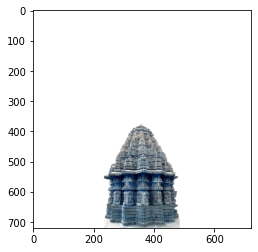

In [61]:
import requests
import cv2
from skimage import io
import matplotlib.pyplot as plt

url = df_3["link"][95]
image = io.imread(url) 
image_2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_2)

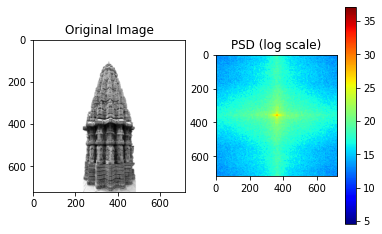

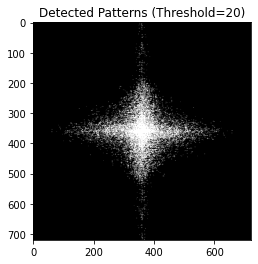

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def detect_patterns(image_path, threshold=0.5):
    # Load the image
    img = image_path

    # Convert the image to grayscale if it's a color image
    if len(img.shape) == 3:
        img = np.mean(img, axis=-1)

    # Calculate 2D FFT
    fft_result = np.fft.fft2(img)

    # Shift zero frequency components to the center
    fft_shifted = np.fft.fftshift(fft_result)

    # Calculate power spectrum density
    psd = np.abs(fft_shifted)**2

    # Use log scale for better visualization
    psd_log = np.log1p(psd)

    # Plot the power spectrum density
    plt.subplot(121)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(122)
    plt.imshow(psd_log, cmap='jet')
    plt.title('PSD (log scale)')
    plt.colorbar()
    # Thresholding to detect patterns
    binary_psd = psd_log > threshold

    # Plot the thresholded PSD
    plt.figure()
    plt.imshow(binary_psd, cmap='gray')
    plt.title(f'Detected Patterns (Threshold={threshold})')
    plt.show()

# Example usage
image_path = 'path/to/your/image.jpg'
detect_patterns(image_2, threshold=20)

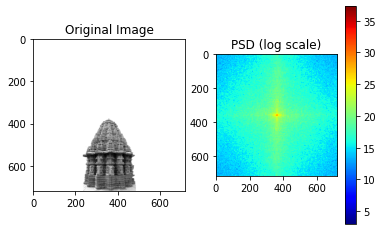

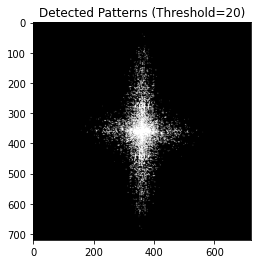

In [62]:
import numpy as np
import matplotlib.pyplot as plt

def detect_patterns(image_path, threshold=0.5):
    # Load the image
    img = image_path

    # Convert the image to grayscale if it's a color image
    if len(img.shape) == 3:
        img = np.mean(img, axis=-1)

    # Calculate 2D FFT
    fft_result = np.fft.fft2(img)

    # Shift zero frequency components to the center
    fft_shifted = np.fft.fftshift(fft_result)

    # Calculate power spectrum density
    psd = np.abs(fft_shifted)**2

    # Use log scale for better visualization
    psd_log = np.log1p(psd)

    # Plot the power spectrum density
    plt.subplot(121)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(122)
    plt.imshow(psd_log, cmap='jet')
    plt.title('PSD (log scale)')
    plt.colorbar()
    # Thresholding to detect patterns
    binary_psd = psd_log > threshold

    # Plot the thresholded PSD
    plt.figure()
    plt.imshow(binary_psd, cmap='gray')
    plt.title(f'Detected Patterns (Threshold={threshold})')
    plt.show()

# Example usage
image_path = 'path/to/your/image.jpg'
detect_patterns(image_2, threshold=20)

In [8]:
conn = sqlite3.connect(
    "img_db_old", check_same_thread=False)

cur = conn.cursor()

In [9]:
df = pd.read_sql(f'select * from (select aspect_data.user_id, aspect_data.session_id, aspect_data.img1, aspect_data.img2, aspect_images.image_class as first_img_class, aspect_data.selection, aspect_data.time_taken, aspect_images.height as h1, aspect_images.width as w1 from aspect_data left join aspect_images on aspect_images.img_id = aspect_data.img1) t left join aspect_images where t.img2 = aspect_images.img_id;', con = conn)

In [4]:
df

user_id  session_id  img1  img2 first_img_class  selection  time_taken  \
0    <User 6>  LKF392RY0M    90    92               2         -1    5.000000   
1    <User 6>  LKF392RY0M    90   108               2         -1    5.000000   
2    <User 6>  LKF392RY0M   100    96               2         -1    5.000000   
3    <User 6>  LKF392RY0M   102    94               2         -1    5.000000   
4    <User 6>  LKF392RY0M    94    90               2         -1    5.000000   
..        ...         ...   ...   ...             ...        ...         ...   
913  <User 7>  AEFCKHU60H   341   328               8         -1    5.000000   
914  <User 7>  AEFCKHU60H   345   333               8         -1    5.000000   
915  <User 7>  AEFCKHU60H   331   330               8        330    2.397083   
916  <User 7>  AEFCKHU60H   337   340               8        337    1.994637   
917  <User 7>  AEFCKHU60H   338   346               8        346    2.328000   

      h1   w1  img_id                                               link  \
0    350  125      92  https://res.cloudinary.com/drqnkfexf/image/upl...   
1    350  125     108  https://res.cloudinary.com/drqnkfexf/image/upl...   
2    350  325      96  https://res.cloudinary.com/drqnkfexf/image/upl...   
3    350  375      94  https://res.cloudinary.com/drqnkfexf/image/upl...   
4    350  225      90  https://res.cloudinary.com/drqnkfexf/image/upl...   
..   ...  ...     ...                                                ...   
913  350  431     328  https://res.cloudinary.com/drqnkfexf/image/upl...   
914  350  507     333  https://res.cloudinary.com/drqnkfexf/image/upl...   
915  350  228     330  https://res.cloudinary.com/drqnkfexf/image/upl...   
916  350  330     340  https://res.cloudinary.com/drqnkfexf/image/upl...   
917  350  355     346  https://res.cloudinary.com/drqnkfexf/image/upl...   

     height  width image_class  
0       350    175           2  
1       350    500           2  
2       350    250           2  
3       350    225           2  
4       350    125           2  
..      ...    ...         ...  
913     350    152           8  
914     350    254           8  
915     350    203           8  
916     350    406           8  
917     350     76           8  

[918 rows x 14 columns]

In [10]:
conn_2 = sqlite3.connect("database_old.db", check_same_thread=False)
cur_2 = conn_2.cursor()

In [11]:
df_2 = pd.read_sql(f'SELECT * from user', con = conn_2)

In [14]:
df_2

id                              email  \
0    1          me20btech11058@iith.ac.in   
1    2             satwik090202@gmail.com   
2    3          bm20btech11001@iith.ac.in   
3    4             akhilgattu02@gmail.com   
4    5         mohan.raghavan.s@gmail.com   
5    6             yashaswinimr@gmail.com   
6    7              arihant1199@gmail.com   
7    8          rajatbhandary19@gmail.com   
8    9                rusty3699@gmail.com   
9   10      ht23resch11001@hst.iith.ac.in   
10  11          ce21resch01002@iith.ac.in   
11  12          ht23resch11002@iith.ac.in   
12  13          BM19RESCH11002@iith.ac.in   
13  14        Akanksha138Pandey@gmail.com   
14  15        tushar.nayak@hst.iith.ac.in   
15  16          bm20btech11012@iith.ac.in   
16  17  akanksha.mhadolkar@hst.iith.ac.in   
17  18             akhilgattu03@gmail.com   
18  19          bm20btech11006@iith.ac.in   
19  20       varshithamanduri25@gmail.com   
20  21            kurmanasamiha@gmail.com   
21  22          bm20btech11018@iith.ac.in   
22  23              abracadabra@gmail.com   
23  24          bm20btech11005@iith.ac.in   
24  25        everesteverest381@gmail.com   
25  26           satwikarawalli@gmail.com   
26  27                  ks@bme.iith.ac.in   
27  28          bm20btech11004@iith.ac.in   
28  29             krithikm2013@gmail.com   
29  30              reddy4asish@gmail.com   
30  31             nirajnikhil5@gmail.com   
31  32        anish.tipnis@hst.iith.ac.in   
32  33          bm20btech11017@iith.ac.in   
33  34             akhilgattu05@gmail.com   
34  35             akhilgattu06@gmail.com   
35  36             akhilgattu07@gmail.com   
36  37                     test@gmail.com   

                                             password  \
0   sha256$l2oKuyKIDNIhn2fh$5e40c30140974f54eff739...   
1   sha256$9gmNeF3YavsiEUhL$bbd95e56827ca6d585e98a...   
2   sha256$PY73f1hcxVbIXBlm$728eb7dc832567f31a9f12...   
3   sha256$azM9oDfkoqMLSpkg$e09382bd07fcbbefdc858a...   
4   sha256$nr2OQXBs99T9DQql$4fa08bfdab6bf330d86c23...   
5   sha256$VEZcDoREJihRfz94$ca86f7b1d031ec093e2c80...   
6   sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...   
7   sha256$RArJL1nB6d3spCkK$0e3425d070fe45e4738b17...   
8   sha256$nIksFfhs8Nmf279a$80313d6d73051d01c20f12...   
9   sha256$ldYpC4T7GH1nsodW$c154b55f4054458361a164...   
10  sha256$uSZ655lIMSrKbsXZ$3b9b5bd947d8899e51aca9...   
11  sha256$iKMkNn3zG6FKWbyz$a54ec01beb53e78fb0185d...   
12  sha256$gqJbM7wGkegtslJi$3c98186aa295dd00acae59...   
13  sha256$5ho5ZjdBfL42R8tD$e0a2a1f38ffe9f512b2ace...   
14  sha256$zNvvu8mflAsleD4C$10627e4a4d257f2972c38a...   
15  sha256$LeJgt6XUIurCri6u$43985c108e03f6f579cd3f...   
16  sha256$FWuX6LplPt0ejuD3$a17ea9b5e59d4b50b47c15...   
17  sha256$lOvoaf2dbS2VMWF8$20f942f6e5e8910dd8c361...   
18  sha256$bYcOFnP3THoKQfXH$f238b5a2cedde09d99bacc...   
19  sha256$yZJWdZ3TnLKHIgfb$8ff33e28f31ae71b763ffd...   
20  sha256$O94K7El1XlAs9PiY$b55ca6205bc15dd705819c...   
21  sha256$jhtKsXFMe5ibJMxK$3198b4f19db24deefc9326...   
22  sha256$nwy8h3PDayPQOwrT$e4037227bb35a9b3ac07b4...   
23  sha256$DVnQltutU3Vlg0Yh$d50891da87cdf31f6012e9...   
24  sha256$gHwt940Kia1ses4n$2a7454d8dcae071b19379e...   
25  sha256$zj40JHh7kTZqrD9L$2b03073406cb48f7131146...   
26  sha256$kGZKJ8smF0DxIarw$b80db780faed32be93a214...   
27  sha256$GDDDb3wdcMrtaWBK$318655411812bdc60760f8...   
28  sha256$mxyI8B2WM8V52giK$34657a8aeb373c10e1181a...   
29  sha256$h6WA15jNOSiOo3xN$d2c2c7a3729084c9137b2b...   
30  sha256$THPEeUEEMGA3UME7$89b7c2284ede63aec94b2f...   
31  sha256$xIVW9n9roISkQMyO$3f4624e49768aa3aaf016d...   
32  sha256$zdxekq9twfvDtbj7$0637ca3cd2eae55497a002...   
33  sha256$l5zJAF9abIJj3Dx4$900b3f75cfeace685ce6f0...   
34  sha256$UsraiPRPypfUWuKQ$f7282576497aa641984958...   
35  sha256$jgJWQWs9K9U6YEp2$5649a3d9c48369c6ba143d...   
36  sha256$OITEecKDq9NvgF1o$01da7397fd60db15e604d7...   

                       first_name  age  gender                rod  
0                 Satwik Arawalli   21    male  Mysuru, Ka

In [12]:
for i in range(0, len(df_2)):
    df_2["id"][i] = '<User ' + str(df_2["id"][i]) + '>'

C:\Users\Akhil\AppData\Local\Temp\ipykernel_4628\2401993780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["id"][i] = '<User ' + str(df_2["id"][i]) + '>'


In [8]:
df_2

id                              email  \
0    <User 1>          me20btech11058@iith.ac.in   
1    <User 2>             satwik090202@gmail.com   
2    <User 3>          bm20btech11001@iith.ac.in   
3    <User 4>             akhilgattu02@gmail.com   
4    <User 5>         mohan.raghavan.s@gmail.com   
5    <User 6>             yashaswinimr@gmail.com   
6    <User 7>              arihant1199@gmail.com   
7    <User 8>          rajatbhandary19@gmail.com   
8    <User 9>                rusty3699@gmail.com   
9   <User 10>      ht23resch11001@hst.iith.ac.in   
10  <User 11>          ce21resch01002@iith.ac.in   
11  <User 12>          ht23resch11002@iith.ac.in   
12  <User 13>          BM19RESCH11002@iith.ac.in   
13  <User 14>        Akanksha138Pandey@gmail.com   
14  <User 15>        tushar.nayak@hst.iith.ac.in   
15  <User 16>          bm20btech11012@iith.ac.in   
16  <User 17>  akanksha.mhadolkar@hst.iith.ac.in   
17  <User 18>             akhilgattu03@gmail.com   
18  <User 19>          bm20btech11006@iith.ac.in   
19  <User 20>       varshithamanduri25@gmail.com   
20  <User 21>            kurmanasamiha@gmail.com   
21  <User 22>          bm20btech11018@iith.ac.in   
22  <User 23>              abracadabra@gmail.com   
23  <User 24>          bm20btech11005@iith.ac.in   
24  <User 25>        everesteverest381@gmail.com   
25  <User 26>           satwikarawalli@gmail.com   
26  <User 27>                  ks@bme.iith.ac.in   
27  <User 28>          bm20btech11004@iith.ac.in   
28  <User 29>             krithikm2013@gmail.com   
29  <User 30>              reddy4asish@gmail.com   
30  <User 31>             nirajnikhil5@gmail.com   
31  <User 32>        anish.tipnis@hst.iith.ac.in   
32  <User 33>          bm20btech11017@iith.ac.in   
33  <User 34>             akhilgattu05@gmail.com   
34  <User 35>             akhilgattu06@gmail.com   
35  <User 36>             akhilgattu07@gmail.com   
36  <User 37>                     test@gmail.com   

                                             password  \
0   sha256$l2oKuyKIDNIhn2fh$5e40c30140974f54eff739...   
1   sha256$9gmNeF3YavsiEUhL$bbd95e56827ca6d585e98a...   
2   sha256$PY73f1hcxVbIXBlm$728eb7dc832567f31a9f12...   
3   sha256$azM9oDfkoqMLSpkg$e09382bd07fcbbefdc858a...   
4   sha256$nr2OQXBs99T9DQql$4fa08bfdab6bf330d86c23...   
5   sha256$VEZcDoREJihRfz94$ca86f7b1d031ec093e2c80...   
6   sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...   
7   sha256$RArJL1nB6d3spCkK$0e3425d070fe45e4738b17...   
8   sha256$nIksFfhs8Nmf279a$80313d6d73051d01c20f12...   
9   sha256$ldYpC4T7GH1nsodW$c154b55f4054458361a164...   
10  sha256$uSZ655lIMSrKbsXZ$3b9b5bd947d8899e51aca9...   
11  sha256$iKMkNn3zG6FKWbyz$a54ec01beb53e78fb0185d...   
12  sha256$gqJbM7wGkegtslJi$3c98186aa295dd00acae59...   
13  sha256$5ho5ZjdBfL42R8tD$e0a2a1f38ffe9f512b2ace...   
14  sha256$zNvvu8mflAsleD4C$10627e4a4d257f2972c38a...   
15  sha256$LeJgt6XUIurCri6u$43985c108e03f6f579cd3f...   
16  sha256$FWuX6LplPt0ejuD3$a17ea9b5e59d4b50b47c15...   
17  sha256$lOvoaf2dbS2VMWF8$20f942f6e5e8910dd8c361...   
18  sha256$bYcOFnP3THoKQfXH$f238b5a2cedde09d99bacc...   
19  sha256$yZJWdZ3TnLKHIgfb$8ff33e28f31ae71b763ffd...   
20  sha256$O94K7El1XlAs9PiY$b55ca6205bc15dd705819c...   
21  sha256$jhtKsXFMe5ibJMxK$3198b4f19db24deefc9326...   
22  sha256$nwy8h3PDayPQOwrT$e4037227bb35a9b3ac07b4...   
23  sha256$DVnQltutU3Vlg0Yh$d50891da87cdf31f6012e9...   
24  sha256$gHwt940Kia1ses4n$2a7454d8dcae071b19379e...   
25  sha256$zj40JHh7kTZqrD9L$2b03073406cb48f7131146...   
26  sha256$kGZKJ8smF0DxIarw$b80db780faed32be93a214...   
27  sha256$GDDDb3wdcMrtaWBK$318655411812bdc60760f8...   
28  sha256$mxyI8B2WM8V52giK$34657a8aeb373c10e1181a...   
29  sha256$h6WA15jNOSiOo3xN$d2c2c7a3729084c9137b2b...   
30  sha256$THPEeUEEMGA3UME7$89b7c2284ede63aec94b2f...   
31  sha256$xIVW9n9roISkQMyO$3f4624e49768aa3aaf016d...   
32  sha256$zdxekq9twfvDtbj7$0637ca3cd2eae55497a002...   
33  sha256$l5zJAF9abIJj3Dx4$900b3f75cfeace685ce6f0...   
34  sha256$UsraiPRPypfUWuKQ$f7282576497

In [13]:
df_3 = pd.merge(df, df_2, left_on='user_id', right_on='id', how='left')

In [17]:
df_3

user_id  session_id  img1  img2 first_img_class  selection  time_taken  \
0    <User 6>  LKF392RY0M    90    92               2         -1    5.000000   
1    <User 6>  LKF392RY0M    90   108               2         -1    5.000000   
2    <User 6>  LKF392RY0M   100    96               2         -1    5.000000   
3    <User 6>  LKF392RY0M   102    94               2         -1    5.000000   
4    <User 6>  LKF392RY0M    94    90               2         -1    5.000000   
..        ...         ...   ...   ...             ...        ...         ...   
913  <User 7>  AEFCKHU60H   341   328               8         -1    5.000000   
914  <User 7>  AEFCKHU60H   345   333               8         -1    5.000000   
915  <User 7>  AEFCKHU60H   331   330               8        330    2.397083   
916  <User 7>  AEFCKHU60H   337   340               8        337    1.994637   
917  <User 7>  AEFCKHU60H   338   346               8        346    2.328000   

      h1   w1  img_id  ... height  width  image_class        id  \
0    350  125      92  ...    350    175            2  <User 6>   
1    350  125     108  ...    350    500            2  <User 6>   
2    350  325      96  ...    350    250            2  <User 6>   
3    350  375      94  ...    350    225            2  <User 6>   
4    350  225      90  ...    350    125            2  <User 6>   
..   ...  ...     ...  ...    ...    ...          ...       ...   
913  350  431     328  ...    350    152            8  <User 7>   
914  350  507     333  ...    350    254            8  <User 7>   
915  350  228     330  ...    350    203            8  <User 7>   
916  350  330     340  ...    350    406            8  <User 7>   
917  350  355     346  ...    350     76            8  <User 7>   

                      email  \
0    yashaswinimr@gmail.com   
1    yashaswinimr@gmail.com   
2    yashaswinimr@gmail.com   
3    yashaswinimr@gmail.com   
4    yashaswinimr@gmail.com   
..                      ...   
913   arihant1199@gmail.com   
914   arihant1199@gmail.com   
915   arihant1199@gmail.com   
916   arihant1199@gmail.com   
917   arihant1199@gmail.com   

                                              password      first_name age  \
0    sha256$VEZcDoREJihRfz94$ca86f7b1d031ec093e2c80...  yashaswini M R  27   
1    sha256$VEZcDoREJihRfz94$ca86f7b1d031ec093e2c80...  yashaswini M R  27   
2    sha256$VEZcDoREJihRfz94$ca86f7b1d031ec093e2c80...  yashaswini M R  27   
3    sha256$VEZcDoREJihRfz94$ca86f7b1d031ec093e2c80...  yashaswini M R  27   
4    sha256$VEZcDoREJihRfz94$ca86f7b1d031ec093e2c80...  yashaswini M R  27   
..                                                 ...             ...  ..   
913  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...        Arihant   23   
914  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...        Arihant   23   
915  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...        Arihant   23   
916  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...        Arihant   23   
917  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...        Arihant   23   

     gender        rod  
0    female  karnataka  
1    female  karnataka  
2    female  karnataka  
3    female  karnataka  
4    female  karnataka  
..      ...        ...  
913    male      Delhi  
914    male      Delhi  
915    male      Delhi  
916    male      Delhi  
917    male      Delhi  

[918 rows x 21 columns]

In [14]:
conn_3 = sqlite3.connect("database.db", check_same_thread=False)
cur_3 = conn_3.cursor()

In [15]:
df_4 = pd.read_sql(f'SELECT * from user', con = conn_3)

In [39]:
df_4

id                                email  \
0    1            me20btech11058@iith.ac.in   
1    2               satwik090202@gmail.com   
2    3            bm20btech11001@iith.ac.in   
3    4               akhilgattu02@gmail.com   
4    5                         sf@gmail.com   
5    6            rajatbhandary19@gmail.com   
6    7                  rusty3699@gmail.com   
7    8                arihant1199@gmail.com   
8    9                       test@gmail.com   
9   10               yashaswinimr@gmail.com   
10  11             arihant.j@hst.iith.ac.in   
11  12            ce21resch01002@iith.ac.in   
12  13            bm18resch11012@iith.ac.in   
13  14            bm19resch11002@iith.ac.in   
14  15            ht23resch11003@iith.ac.in   
15  16  nitila.gokulkrishnan@hst.iith.ac.in   
16  17            ai21resch11005@iith.ac.in   
17  18            ht23resch11005@iith.ac.in   
18  19               divyagracy95@gmail.com   
19  20          yugmaheshwari2004@gmail.com   
20  21              manasarawalli@gmail.com   
21  22              pranavi.gattu@gmail.com   
22  23          aditi.s.agarwal02@gmail.com   
23  24          Krishnavenigattu2@gmail.com   
24  25            ms20btech11026@iith.ac.in   
25  26               eswarsai0903@gmail.com   
26  27                 saiprajoth@gmail.com   
27  28            mi22mtech11003@iith.ac.in   
28  29            bm21btech11001@iith.ac.in   
29  30            bm20btech11011@iith.ac.in   
30  31       himangshukothari1999@gmail.com   
31  32                  lifeshaih@gmail.com   

                                             password  \
0   sha256$l2oKuyKIDNIhn2fh$5e40c30140974f54eff739...   
1   sha256$9gmNeF3YavsiEUhL$bbd95e56827ca6d585e98a...   
2   pbkdf2:sha256:260000$3fCy3bcD6eBzP4GS$4837ee14...   
3   pbkdf2:sha256:260000$7FwRRxlWevrgAVGK$ce800051...   
4   pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...   
5   pbkdf2:sha256:260000$kFzN2TKYsSPMJfOk$d3ca57fa...   
6   pbkdf2:sha256:260000$QjrSjS5Oe7iMrNN9$45796f37...   
7   sha256$kYGrcBlnxKvTdyHF$aff02ad063d2d145ca0cd7...   
8   sha256$YtTGadqh5IrNo6H7$cb6c4ffc4c162413454217...   
9   sha256$fUysZ5kvxnElbgy4$290ce90c5d51427356306d...   
10  pbkdf2:sha256:260000$w5w2POtfcFCG8FGO$c4719483...   
11  sha256$lRYg6LMgMTwj8oUb$4f629fbb4b8a5a60e509f4...   
12  sha256$XIVblpXsBRohdtYn$e37f239f5cec320efbb8ab...   
13  sha256$MSnaBfigTswJvxbd$aa8b388de577f572dddaa5...   
14  sha256$oR7KIk3XxiS2zbg7$70a631a79aed0c0a008e57...   
15  sha256$G2YbQOgdpOVSWprU$1c8ddae8e79896d2b1b1ca...   
16  sha256$Hk3d07V3GRsdqg3h$3ba8a235df64888771c1e7...   
17  sha256$qNAWmxdwmkkMApTk$88a2d6b3e11d9bfdb94b62...   
18  sha256$xuq1A9IuqGK0kics$72eac1e4024f46a940527c...   
19  sha256$nYY54ruqiMffXRYH$54c4771d37f3966dae516d...   
20  sha256$Tl50ROAQ2iI7YNut$bf60aeb79694bed9cad90f...   
21  sha256$LP97gxhf5QuWd6VM$ee8d47638a06575e5d6f27...   
22  sha256$FY91JU3Eokz99OFG$4df617e17f31f1b09be1b8...   
23  sha256$LTE3fra7krdWGO0j$2cbcd3d4b8e2c8166de14a...   
24  sha256$79IpHapdBlKfIknT$f8c5080a8f886f956b0b7a...   
25  sha256$T1vYLrUYx2TjCfOq$9ebfdc54ce4978619f17ef...   
26  sha256$ygqVsFK0MWWnl74s$8d3923e182f41b50e3a891...   
27  sha256$qRjbFA0ADFRWTtgy$4d7902652418ee4eccff68...   
28  sha256$azeTrptGKaVcSJra$5cee2e244d26a15e3c551f...   
29  sha256$BriGBqohLupJzHAG$472f8f585a5f1046ab84c6...   
30  sha256$11sMTX1OQBRWvrqr$ef68a218dff1d74f76152e...   
31  sha256$ZBrJ0A07gZT8pNru$fbbbb90b0c2cea97779695...   

                  first_name  age  gender                    rod  \
0            Satwik Arawalli   21    male      Mysuru, Karnataka   
1                   Satwik A   21    male              Karnataka   
2                      Akhil   22    male                   Test   
3                 Akhil_test   22    male                          
4                         sf   12    male                  india   
5                      rajat   21    male                  india   
6        rusty3699@gmail.com   24    male              Hyderabad   
7               Arihant Ja

In [16]:
for i in range(0, len(df_4)):
    df_4["id"][i] = '<User ' + str(df_4["id"][i]) + '>'

C:\Users\Akhil\AppData\Local\Temp\ipykernel_4628\2401352835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4["id"][i] = '<User ' + str(df_4["id"][i]) + '>'


In [41]:
df_4

id                                email  \
0    <User 1>            me20btech11058@iith.ac.in   
1    <User 2>               satwik090202@gmail.com   
2    <User 3>            bm20btech11001@iith.ac.in   
3    <User 4>               akhilgattu02@gmail.com   
4    <User 5>                         sf@gmail.com   
5    <User 6>            rajatbhandary19@gmail.com   
6    <User 7>                  rusty3699@gmail.com   
7    <User 8>                arihant1199@gmail.com   
8    <User 9>                       test@gmail.com   
9   <User 10>               yashaswinimr@gmail.com   
10  <User 11>             arihant.j@hst.iith.ac.in   
11  <User 12>            ce21resch01002@iith.ac.in   
12  <User 13>            bm18resch11012@iith.ac.in   
13  <User 14>            bm19resch11002@iith.ac.in   
14  <User 15>            ht23resch11003@iith.ac.in   
15  <User 16>  nitila.gokulkrishnan@hst.iith.ac.in   
16  <User 17>            ai21resch11005@iith.ac.in   
17  <User 18>            ht23resch11005@iith.ac.in   
18  <User 19>               divyagracy95@gmail.com   
19  <User 20>          yugmaheshwari2004@gmail.com   
20  <User 21>              manasarawalli@gmail.com   
21  <User 22>              pranavi.gattu@gmail.com   
22  <User 23>          aditi.s.agarwal02@gmail.com   
23  <User 24>          Krishnavenigattu2@gmail.com   
24  <User 25>            ms20btech11026@iith.ac.in   
25  <User 26>               eswarsai0903@gmail.com   
26  <User 27>                 saiprajoth@gmail.com   
27  <User 28>            mi22mtech11003@iith.ac.in   
28  <User 29>            bm21btech11001@iith.ac.in   
29  <User 30>            bm20btech11011@iith.ac.in   
30  <User 31>       himangshukothari1999@gmail.com   
31  <User 32>                  lifeshaih@gmail.com   

                                             password  \
0   sha256$l2oKuyKIDNIhn2fh$5e40c30140974f54eff739...   
1   sha256$9gmNeF3YavsiEUhL$bbd95e56827ca6d585e98a...   
2   pbkdf2:sha256:260000$3fCy3bcD6eBzP4GS$4837ee14...   
3   pbkdf2:sha256:260000$7FwRRxlWevrgAVGK$ce800051...   
4   pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...   
5   pbkdf2:sha256:260000$kFzN2TKYsSPMJfOk$d3ca57fa...   
6   pbkdf2:sha256:260000$QjrSjS5Oe7iMrNN9$45796f37...   
7   sha256$kYGrcBlnxKvTdyHF$aff02ad063d2d145ca0cd7...   
8   sha256$YtTGadqh5IrNo6H7$cb6c4ffc4c162413454217...   
9   sha256$fUysZ5kvxnElbgy4$290ce90c5d51427356306d...   
10  pbkdf2:sha256:260000$w5w2POtfcFCG8FGO$c4719483...   
11  sha256$lRYg6LMgMTwj8oUb$4f629fbb4b8a5a60e509f4...   
12  sha256$XIVblpXsBRohdtYn$e37f239f5cec320efbb8ab...   
13  sha256$MSnaBfigTswJvxbd$aa8b388de577f572dddaa5...   
14  sha256$oR7KIk3XxiS2zbg7$70a631a79aed0c0a008e57...   
15  sha256$G2YbQOgdpOVSWprU$1c8ddae8e79896d2b1b1ca...   
16  sha256$Hk3d07V3GRsdqg3h$3ba8a235df64888771c1e7...   
17  sha256$qNAWmxdwmkkMApTk$88a2d6b3e11d9bfdb94b62...   
18  sha256$xuq1A9IuqGK0kics$72eac1e4024f46a940527c...   
19  sha256$nYY54ruqiMffXRYH$54c4771d37f3966dae516d...   
20  sha256$Tl50ROAQ2iI7YNut$bf60aeb79694bed9cad90f...   
21  sha256$LP97gxhf5QuWd6VM$ee8d47638a06575e5d6f27...   
22  sha256$FY91JU3Eokz99OFG$4df617e17f31f1b09be1b8...   
23  sha256$LTE3fra7krdWGO0j$2cbcd3d4b8e2c8166de14a...   
24  sha256$79IpHapdBlKfIknT$f8c5080a8f886f956b0b7a...   
25  sha256$T1vYLrUYx2TjCfOq$9ebfdc54ce4978619f17ef...   
26  sha256$ygqVsFK0MWWnl74s$8d3923e182f41b50e3a891...   
27  sha256$qRjbFA0ADFRWTtgy$4d7902652418ee4eccff68...   
28  sha256$azeTrptGKaVcSJra$5cee2e244d26a15e3c551f...   
29  sha256$BriGBqohLupJzHAG$472f8f585a5f1046ab84c6...   
30  sha256$11sMTX1OQBRWvrqr$ef68a218dff1d74f76152e...   
31  sha256$ZBrJ0A07gZT8pNru$fbbbb90b0c2cea97779695...   

                  first_name  age  gender                    rod  \
0            Satwik Arawalli   21    male      Mysuru, Karnataka   
1                   Satwik A   21    male              Karnataka   
2                      Akhil   22    male                   Test   
3                 Akhil_test   22    male                          
4     

In [17]:
conn = sqlite3.connect(
    "img_db", check_same_thread=False)

cur = conn.cursor()

In [18]:
df_6 = pd.read_sql(f'select * from (select aspect_data.user_id, aspect_data.session_id, aspect_data.img1, aspect_data.img2, aspect_images.image_class as first_img_class, aspect_data.selection, aspect_data.time_taken, aspect_images.height as h1, aspect_images.width as w1 from aspect_data left join aspect_images on aspect_images.img_id = aspect_data.img1) t left join aspect_images where t.img2 = aspect_images.img_id;', con = conn)

In [19]:
df_7 = pd.merge(df_6, df_4, left_on='user_id', right_on='id', how='left')

In [20]:
df_7

user_id  session_id  img1  img2 first_img_class  selection  \
0      <User 5>  L13Q31O33Q   145   155               3         -1   
1      <User 5>  L13Q31O33Q   143   140               3         -1   
2      <User 5>  L13Q31O33Q   147   157               3         -1   
3      <User 5>  L13Q31O33Q   146   155               3         -1   
4      <User 5>  L13Q31O33Q   140   139               3         -1   
...         ...         ...   ...   ...             ...        ...   
2637  <User 32>  7M95FRH8VB   375   367               9         -1   
2638  <User 32>  7M95FRH8VB   393   363               9         -1   
2639  <User 32>  7M95FRH8VB   392   389               9        389   
2640  <User 32>  7M95FRH8VB   396   390               9        390   
2641  <User 32>  7M95FRH8VB   362   359               9        362   

      time_taken   h1   w1  img_id  ... image_class         id  \
0       5.000000  247  665     155  ...           3   <User 5>   
1       5.000000  247  595     140  ...           3   <User 5>   
2       5.000000  247  700     157  ...           3   <User 5>   
3       5.000000  247   70     155  ...           3   <User 5>   
4       5.000000  247  490     139  ...           3   <User 5>   
...          ...  ...  ...     ...  ...         ...        ...   
2637    5.000000  222  420     367  ...           9  <User 32>   
2638    5.000000  421  350     363  ...           9  <User 32>   
2639    3.229851  399  350     389  ...           9  <User 32>   
2640    2.830666   66  350     390  ...           9  <User 32>   
2641    3.243650  199  350     359  ...           9  <User 32>   

                    email                                           password  \
0            sf@gmail.com  pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...   
1            sf@gmail.com  pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...   
2            sf@gmail.com  pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...   
3            sf@gmail.com  pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...   
4            sf@gmail.com  pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...   
...                   ...                                                ...   
2637  lifeshaih@gmail.com  sha256$ZBrJ0A07gZT8pNru$fbbbb90b0c2cea97779695...   
2638  lifeshaih@gmail.com  sha256$ZBrJ0A07gZT8pNru$fbbbb90b0c2cea97779695...   
2639  lifeshaih@gmail.com  sha256$ZBrJ0A07gZT8pNru$fbbbb90b0c2cea97779695...   
2640  lifeshaih@gmail.com  sha256$ZBrJ0A07gZT8pNru$fbbbb90b0c2cea97779695...   
2641  lifeshaih@gmail.com  sha256$ZBrJ0A07gZT8pNru$fbbbb90b0c2cea97779695...   

     first_name age gender            rod  reset_token reset_token_expires  
0            sf  12   male          india         None                None  
1            sf  12   male          india         None                None  
2            sf  12   male          india         None                None  
3            sf  12   male          india         None                None  
4            sf  12   male          india         None                None  
...         ...  ..    ...            ...          ...                 ...  
2637   Ravindra  21   male  Uttar Pradesh         None                None  
2638   Ravindra  21   male  Uttar Pradesh         None                None  
2639   Ravindra  21   male  Uttar Pradesh         None                None  
2640   Ravindra  21   male  Uttar Pradesh         None                None  
2641   Ravindra  21   male  Uttar Pradesh         None                None  

[2642 rows x 23 columns]

In [20]:
df_7 = pd.concat([df_7, df_3], axis = 0, ignore_index = True)

In [33]:
df_7

user_id  session_id  img1  img2 first_img_class  selection  time_taken  \
0     <User 5>  L13Q31O33Q   145   155               3         -1    5.000000   
1     <User 5>  L13Q31O33Q   143   140               3         -1    5.000000   
2     <User 5>  L13Q31O33Q   147   157               3         -1    5.000000   
3     <User 5>  L13Q31O33Q   146   155               3         -1    5.000000   
4     <User 5>  L13Q31O33Q   140   139               3         -1    5.000000   
...        ...         ...   ...   ...             ...        ...         ...   
3555  <User 7>  AEFCKHU60H   341   328               8         -1    5.000000   
3556  <User 7>  AEFCKHU60H   345   333               8         -1    5.000000   
3557  <User 7>  AEFCKHU60H   331   330               8        330    2.397083   
3558  <User 7>  AEFCKHU60H   337   340               8        337    1.994637   
3559  <User 7>  AEFCKHU60H   338   346               8        346    2.328000   

       h1   w1  img_id  ... image_class        id                  email  \
0     247  665     155  ...           3  <User 5>           sf@gmail.com   
1     247  595     140  ...           3  <User 5>           sf@gmail.com   
2     247  700     157  ...           3  <User 5>           sf@gmail.com   
3     247   70     155  ...           3  <User 5>           sf@gmail.com   
4     247  490     139  ...           3  <User 5>           sf@gmail.com   
...   ...  ...     ...  ...         ...       ...                    ...   
3555  350  431     328  ...           8  <User 7>  arihant1199@gmail.com   
3556  350  507     333  ...           8  <User 7>  arihant1199@gmail.com   
3557  350  228     330  ...           8  <User 7>  arihant1199@gmail.com   
3558  350  330     340  ...           8  <User 7>  arihant1199@gmail.com   
3559  350  355     346  ...           8  <User 7>  arihant1199@gmail.com   

                                               password first_name age gender  \
0     pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...         sf  12   male   
1     pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...         sf  12   male   
2     pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...         sf  12   male   
3     pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...         sf  12   male   
4     pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...         sf  12   male   
...                                                 ...        ...  ..    ...   
3555  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...   Arihant   23   male   
3556  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...   Arihant   23   male   
3557  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...   Arihant   23   male   
3558  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...   Arihant   23   male   
3559  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...   Arihant   23   male   

        rod  reset_token reset_token_expires  
0     india         None                None  
1     india         None                None  
2     india         None                None  
3     india         None                None  
4     india         None                None  
...     ...          ...                 ...  
3555  Delhi          NaN                 NaN  
3556  Delhi          NaN                 NaN  
3557  Delhi          NaN                 NaN  
3558  Delhi          NaN                 NaN  
3559  Delhi          NaN                 NaN  

[3560 rows x 23 columns]

In [34]:
df_8 = df_7[df_7["selection"] != -1]

In [35]:
df_8

user_id  session_id  img1  img2 first_img_class  selection  time_taken  \
143   <User 5>  KZBDKHN3SU   105   113               2        105    1.608557   
144   <User 5>  KZBDKHN3SU   107   106               2        106    0.851762   
223   <User 5>  5IFJ2IGY7X   118   101               2        101    0.923297   
402   <User 5>  W92E1W3C6G   323   356               8        323    2.361869   
469   <User 5>  XSFKDDONLF   241   272               6        272    0.412087   
...        ...         ...   ...   ...             ...        ...         ...   
3552  <User 7>  AEFCKHU60H   326   346               8        346    2.588444   
3553  <User 7>  AEFCKHU60H   330   346               8        330    3.079760   
3557  <User 7>  AEFCKHU60H   331   330               8        330    2.397083   
3558  <User 7>  AEFCKHU60H   337   340               8        337    1.994637   
3559  <User 7>  AEFCKHU60H   338   346               8        346    2.328000   

       h1   w1  img_id  ... image_class        id                  email  \
143   350  450     113  ...           2  <User 5>           sf@gmail.com   
144   350   50     106  ...           2  <User 5>           sf@gmail.com   
223   665  250     101  ...           2  <User 5>           sf@gmail.com   
402   280  254     356  ...           8  <User 5>           sf@gmail.com   
469   126  350     272  ...           6  <User 5>           sf@gmail.com   
...   ...  ...     ...  ...         ...       ...                    ...   
3552  350  101     346  ...           8  <User 7>  arihant1199@gmail.com   
3553  350  203     346  ...           8  <User 7>  arihant1199@gmail.com   
3557  350  228     330  ...           8  <User 7>  arihant1199@gmail.com   
3558  350  330     340  ...           8  <User 7>  arihant1199@gmail.com   
3559  350  355     346  ...           8  <User 7>  arihant1199@gmail.com   

                                               password first_name age gender  \
143   pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...         sf  12   male   
144   pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...         sf  12   male   
223   pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...         sf  12   male   
402   pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...         sf  12   male   
469   pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...         sf  12   male   
...                                                 ...        ...  ..    ...   
3552  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...   Arihant   23   male   
3553  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...   Arihant   23   male   
3557  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...   Arihant   23   male   
3558  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...   Arihant   23   male   
3559  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...   Arihant   23   male   

        rod  reset_token reset_token_expires  
143   india         None                None  
144   india         None                None  
223   india         None                None  
402   india         None                None  
469   india         None                None  
...     ...          ...                 ...  
3552  Delhi          NaN                 NaN  
3553  Delhi          NaN                 NaN  
3557  Delhi          NaN                 NaN  
3558  Delhi          NaN                 NaN  
3559  Delhi          NaN                 NaN  

[911 rows x 23 columns]

In [36]:
df_8 = df_8.reset_index()
df_8

index   user_id  session_id  img1  img2 first_img_class  selection  \
0      143  <User 5>  KZBDKHN3SU   105   113               2        105   
1      144  <User 5>  KZBDKHN3SU   107   106               2        106   
2      223  <User 5>  5IFJ2IGY7X   118   101               2        101   
3      402  <User 5>  W92E1W3C6G   323   356               8        323   
4      469  <User 5>  XSFKDDONLF   241   272               6        272   
..     ...       ...         ...   ...   ...             ...        ...   
906   3552  <User 7>  AEFCKHU60H   326   346               8        346   
907   3553  <User 7>  AEFCKHU60H   330   346               8        330   
908   3557  <User 7>  AEFCKHU60H   331   330               8        330   
909   3558  <User 7>  AEFCKHU60H   337   340               8        337   
910   3559  <User 7>  AEFCKHU60H   338   346               8        346   

     time_taken   h1   w1  ...  image_class        id                  email  \
0      1.608557  350  450  ...            2  <User 5>           sf@gmail.com   
1      0.851762  350   50  ...            2  <User 5>           sf@gmail.com   
2      0.923297  665  250  ...            2  <User 5>           sf@gmail.com   
3      2.361869  280  254  ...            8  <User 5>           sf@gmail.com   
4      0.412087  126  350  ...            6  <User 5>           sf@gmail.com   
..          ...  ...  ...  ...          ...       ...                    ...   
906    2.588444  350  101  ...            8  <User 7>  arihant1199@gmail.com   
907    3.079760  350  203  ...            8  <User 7>  arihant1199@gmail.com   
908    2.397083  350  228  ...            8  <User 7>  arihant1199@gmail.com   
909    1.994637  350  330  ...            8  <User 7>  arihant1199@gmail.com   
910    2.328000  350  355  ...            8  <User 7>  arihant1199@gmail.com   

                                              password first_name age gender  \
0    pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...         sf  12   male   
1    pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...         sf  12   male   
2    pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...         sf  12   male   
3    pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...         sf  12   male   
4    pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...         sf  12   male   
..                                                 ...        ...  ..    ...   
906  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...   Arihant   23   male   
907  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...   Arihant   23   male   
908  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...   Arihant   23   male   
909  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...   Arihant   23   male   
910  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...   Arihant   23   male   

       rod reset_token  reset_token_expires  
0    india        None                 None  
1    india        None                 None  
2    india        None                 None  
3    india        None                 None  
4    india        None                 None  
..     ...         ...                  ...  
906  Delhi         NaN                  NaN  
907  Delhi         NaN                  NaN  
908  Delhi         NaN                  NaN  
909  Delhi         NaN                  NaN  
910  Delhi         NaN                  NaN  

[911 rows x 24 columns]

In [37]:
df_8["selected_aspect_ratio"]= ""
df_8["img_1_aspect_ratio"] = ""
df_8["img_2_aspect_ratio"] = ""
for i in range(0, len(df_8)):
    df_8["img_1_aspect_ratio"][i] = round(df_8["h1"].iloc[i]/df_8["w1"].iloc[i], 1)
    df_8["img_2_aspect_ratio"][i] = round(df_8["height"].iloc[i]/df_8["width"].iloc[i], 1)
    if df_8["selection"].iloc[i] == df_8["img1"].iloc[i]:
        df_8["selected_aspect_ratio"][i] = round(df_8["h1"].iloc[i]/df_8["w1"].iloc[i], 1)
    else:
        df_8["selected_aspect_ratio"][i] = round(df_8["height"].iloc[i]/df_8["width"].iloc[i], 1)
df_8

C:\Users\Akhil\AppData\Local\Temp\ipykernel_4628\253221692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8["img_1_aspect_ratio"][i] = round(df_8["h1"].iloc[i]/df_8["w1"].iloc[i], 1)
C:\Users\Akhil\AppData\Local\Temp\ipykernel_4628\253221692.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8["img_2_aspect_ratio"][i] = round(df_8["height"].iloc[i]/df_8["width"].iloc[i], 1)
C:\Users\Akhil\AppData\Local\Temp\ipykernel_4628\253221692.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

index   user_id  session_id  img1  img2 first_img_class  selection  \
0      143  <User 5>  KZBDKHN3SU   105   113               2        105   
1      144  <User 5>  KZBDKHN3SU   107   106               2        106   
2      223  <User 5>  5IFJ2IGY7X   118   101               2        101   
3      402  <User 5>  W92E1W3C6G   323   356               8        323   
4      469  <User 5>  XSFKDDONLF   241   272               6        272   
..     ...       ...         ...   ...   ...             ...        ...   
906   3552  <User 7>  AEFCKHU60H   326   346               8        346   
907   3553  <User 7>  AEFCKHU60H   330   346               8        330   
908   3557  <User 7>  AEFCKHU60H   331   330               8        330   
909   3558  <User 7>  AEFCKHU60H   337   340               8        337   
910   3559  <User 7>  AEFCKHU60H   338   346               8        346   

     time_taken   h1   w1  ...  \
0      1.608557  350  450  ...   
1      0.851762  350   50  ...   
2      0.923297  665  250  ...   
3      2.361869  280  254  ...   
4      0.412087  126  350  ...   
..          ...  ...  ...  ...   
906    2.588444  350  101  ...   
907    3.079760  350  203  ...   
908    2.397083  350  228  ...   
909    1.994637  350  330  ...   
910    2.328000  350  355  ...   

                                              password first_name  age  \
0    pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...         sf   12   
1    pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...         sf   12   
2    pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...         sf   12   
3    pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...         sf   12   
4    pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...         sf   12   
..                                                 ...        ...  ...   
906  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...   Arihant    23   
907  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...   Arihant    23   
908  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...   Arihant    23   
909  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...   Arihant    23   
910  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...   Arihant    23   

     gender    rod reset_token reset_token_expires selected_aspect_ratio  \
0      male  india        None                None                   0.8   
1      male  india        None                None                   0.7   
2      male  india        None                None                   1.0   
3      male  india        None                None                   1.1   
4      male  india        None                None                   1.0   
..      ...    ...         ...                 ...                   ...   
906    male  Delhi         NaN                 NaN                   4.6   
907    male  Delhi         NaN                 NaN                   1.7   
908    male  Delhi         NaN                 NaN                   1.7   
909    male  Delhi         NaN                 NaN                   1.1   
910    male  Delhi         NaN                 NaN                   4.6   

    img_1_aspect_ratio  img_2_aspect_ratio  
0                  0.8                 2.0  
1                  7.0                 0.7  
2                  2.7                 1.0  
3                  1.1                 0.3  
4                  0.4                 1.0  
..                 ...                 ...  
906                3.5                 4.6  
907                1.7                 4.6  
908                1.5                 1.7  
909                1.1                 0.9  
910                1.0                 4.6  

[911 rows x 27 columns]

In [97]:
df_9 = pd.merge(df_7, df_8, left_on=['img1', 'img2', 'selection'], right_on=['img_id', 'img_id', 'img_id'], how='left')

In [26]:
df_8

index   user_id  session_id  img1  img2 first_img_class  selection  \
0      143  <User 5>  KZBDKHN3SU   105   113               2        105   
1      144  <User 5>  KZBDKHN3SU   107   106               2        106   
2      223  <User 5>  5IFJ2IGY7X   118   101               2        101   
3      402  <User 5>  W92E1W3C6G   323   356               8        323   
4      469  <User 5>  XSFKDDONLF   241   272               6        272   
..     ...       ...         ...   ...   ...             ...        ...   
906   3552  <User 7>  AEFCKHU60H   326   346               8        346   
907   3553  <User 7>  AEFCKHU60H   330   346               8        330   
908   3557  <User 7>  AEFCKHU60H   331   330               8        330   
909   3558  <User 7>  AEFCKHU60H   337   340               8        337   
910   3559  <User 7>  AEFCKHU60H   338   346               8        346   

     time_taken   h1   w1  ...  \
0      1.608557  350  450  ...   
1      0.851762  350   50  ...   
2      0.923297  665  250  ...   
3      2.361869  280  254  ...   
4      0.412087  126  350  ...   
..          ...  ...  ...  ...   
906    2.588444  350  101  ...   
907    3.079760  350  203  ...   
908    2.397083  350  228  ...   
909    1.994637  350  330  ...   
910    2.328000  350  355  ...   

                                              password first_name  age  \
0    pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...         sf   12   
1    pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...         sf   12   
2    pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...         sf   12   
3    pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...         sf   12   
4    pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...         sf   12   
..                                                 ...        ...  ...   
906  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...   Arihant    23   
907  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...   Arihant    23   
908  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...   Arihant    23   
909  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...   Arihant    23   
910  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...   Arihant    23   

     gender    rod reset_token reset_token_expires selected_aspect_ratio  \
0      male  india        None                None                   0.8   
1      male  india        None                None                   0.7   
2      male  india        None                None                   1.0   
3      male  india        None                None                   1.1   
4      male  india        None                None                   1.0   
..      ...    ...         ...                 ...                   ...   
906    male  Delhi         NaN                 NaN                   4.6   
907    male  Delhi         NaN                 NaN                   1.7   
908    male  Delhi         NaN                 NaN                   1.7   
909    male  Delhi         NaN                 NaN                   1.1   
910    male  Delhi         NaN                 NaN                   4.6   

    img_1_aspect_ratio  img_2_aspect_ratio  
0                  0.8                 2.0  
1                  7.0                 0.7  
2                  2.7                 1.0  
3                  1.1                 0.3  
4                  0.4                 1.0  
..                 ...                 ...  
906                3.5                 4.6  
907                1.7                 4.6  
908                1.5                 1.7  
909                1.1                 0.9  
910                1.0                 4.6  

[911 rows x 27 columns]

In [33]:
df_10

NameError: name 'df_10' is not defined

In [21]:
session_counts = df_10.groupby("session_id").size().reset_index(name='count')

# Filter the DataFrame based on the count condition (> 20)
filtered_df = df_10[df_10['session_id'].isin(session_counts[session_counts['count'] > 20]['session_id'])]

In [65]:
df_8.groupby("image_class").count()

index  user_id  session_id  img1  img2  first_img_class  \
image_class                                                            
1               91       91          91    91    91               91   
10              90       90          90    90    90               90   
2              165      165         165   165   165              165   
3              104      104         104   104   104              104   
4               82       82          82    82    82               82   
5               86       86          86    86    86               86   
6               61       61          61    61    61               61   
7               61       61          61    61    61               61   
8               80       80          80    80    80               80   
9               91       91          91    91    91               91   

             selection  time_taken   h1   w1  ...  password  first_name  age  \
image_class                                   ...                              
1                   91          91   91   91  ...        91          91   91   
10                  90          90   90   90  ...        90          90   90   
2                  165         165  165  165  ...       165         165  165   
3                  104         104  104  104  ...       104         104  104   
4                   82          82   82   82  ...        82          82   82   
5                   86          86   86   86  ...        86          86   86   
6                   61          61   61   61  ...        61          61   61   
7                   61          61   61   61  ...        61          61   61   
8                   80          80   80   80  ...        80          80   80   
9                   91          91   91   91  ...        91          91   91   

             gender  rod  reset_token  reset_token_expires  \
image_class                                                  
1                91   91            0                    0   
10               90   90           10                   10   
2               165  165            0                    0   
3               104  104            0                    0   
4                82   82            0                    0   
5                86   86            0                    0   
6                61   61            7                    7   
7                61   61            0                    0   
8                80   80            0                    0   
9                91   91            0                    0   

             selected_aspect_ratio  img_1_aspect_ratio  img_2_aspect_ratio  
image_class                                                                 
1                               91                  91                  91  
10                              90                  90                  90  
2                              165                 165                 165  
3                              104                 104                 104  
4                               82                  82                  82  
5                               86                  86                  86  
6                               61                  61                  61  
7                               61                  61                  61  
8                               80                  80                  80  
9                               91                  91                  91  

[10 rows x 26 columns]

In [108]:
df_10[df_10["session_id"] == 'R1OXALGVNL']

user_id  session_id  img1  img2  selection  time_taken        id  \
1546  <User 6>  R1OXALGVNL   211   205        205    1.001425  <User 6>   
1547  <User 6>  R1OXALGVNL   210   227        210    0.463665  <User 6>   
1548  <User 6>  R1OXALGVNL   202   234        234    0.499372  <User 6>   
1551  <User 6>  R1OXALGVNL   212   203        212    1.168103  <User 6>   
1552  <User 6>  R1OXALGVNL   213   239        213    0.511281  <User 6>   
1553  <User 6>  R1OXALGVNL   220   214        220    0.774352  <User 6>   
1554  <User 6>  R1OXALGVNL   225   209        225    1.405987  <User 6>   
1555  <User 6>  R1OXALGVNL   228   238        228    0.982971  <User 6>   
1556  <User 6>  R1OXALGVNL   201   214        201    0.670369  <User 6>   
1557  <User 6>  R1OXALGVNL   221   205        221    2.971918  <User 6>   
1558  <User 6>  R1OXALGVNL   203   231        203    1.846993  <User 6>   
1566  <User 6>  R1OXALGVNL   211   205        205    1.001425  <User 6>   
1567  <User 6>  R1OXALGVNL   210   227        210    0.463665  <User 6>   
1568  <User 6>  R1OXALGVNL   202   234        234    0.499372  <User 6>   
1571  <User 6>  R1OXALGVNL   212   203        212    1.168103  <User 6>   
1572  <User 6>  R1OXALGVNL   213   239        213    0.511281  <User 6>   
1573  <User 6>  R1OXALGVNL   220   214        220    0.774352  <User 6>   
1574  <User 6>  R1OXALGVNL   225   209        225    1.405987  <User 6>   
1575  <User 6>  R1OXALGVNL   228   238        228    0.982971  <User 6>   
1576  <User 6>  R1OXALGVNL   201   214        201    0.670369  <User 6>   
1577  <User 6>  R1OXALGVNL   221   205        221    2.971918  <User 6>   
1578  <User 6>  R1OXALGVNL   203   231        203    1.846993  <User 6>   
1586  <User 6>  R1OXALGVNL   211   205        205    1.001425  <User 6>   
1587  <User 6>  R1OXALGVNL   210   227        210    0.463665  <User 6>   
1588  <User 6>  R1OXALGVNL   202   234        234    0.499372  <User 6>   
1591  <User 6>  R1OXALGVNL   212   203        212    1.168103  <User 6>   
1592  <User 6>  R1OXALGVNL   213   239        213    0.511281  <User 6>   
1593  <User 6>  R1OXALGVNL   220   214        220    0.774352  <User 6>   
1594  <User 6>  R1OXALGVNL   225   209        225    1.405987  <User 6>   
1595  <User 6>  R1OXALGVNL   228   238        228    0.982971  <User 6>   
1596  <User 6>  R1OXALGVNL   201   214        201    0.670369  <User 6>   
1597  <User 6>  R1OXALGVNL   221   205        221    2.971918  <User 6>   
1598  <User 6>  R1OXALGVNL   203   231        203    1.846993  <User 6>   

                          email  \
1546  rajatbhandary19@gmail.com   
1547  rajatbhandary19@gmail.com   
1548  rajatbhandary19@gmail.com   
1551  rajatbhandary19@gmail.com   
1552  rajatbhandary19@gmail.com   
1553  rajatbhandary19@gmail.com   
1554  rajatbhandary19@gmail.com   
1555  rajatbhandary19@gmail.com   
1556  rajatbhandary19@gmail.com   
1557  rajatbhandary19@gmail.com   
1558  rajatbhandary19@gmail.com   
1566  rajatbhandary19@gmail.com   
1567  rajatbhandary19@gmail.com   
1568  rajatbhandary19@gmail.com   
1571  rajatbhandary19@gmail.com   
1572  rajatbhandary19@gmail.com   
1573  rajatbhandary19@gmail.com   
1574  rajatbhandary19@gmail.com   
1575  rajatbhandary19@gmail.com   
1576  rajatbhandary19@gmail.com   
1577  rajatbhandary19@gmail.com   
1578  rajatbhandary19@gmail.com   
1586  rajatbhandary19@gmail.com   
1587  rajatbhandary19@gmail.com   
1588  rajatbhandary19@gmail.com   
1591  rajatbhandary19@gmail.com   
1592  rajatbhandary19@gmail.com   
1593  rajatbhandary19@gmail.com   
1594  rajatbhandary19@gmail.com   
1595  rajatbhandary19@gmail.com   
1596  rajatbhandary19@gmail.com   
1597  rajatbhandary19@gmail.com   
1598  rajatbhandary19@gmail.com   

                                               password first_name  age  \
1546  pbkdf2:sha256:600000$xQtH5huLD6VHojrL$ffd1d825...      rajat   21   
1547  pbkdf2:sha256:600000$xQtH5huLD6VHojrL$ffd1d825...      rajat   21   
1548  pbkdf2:sha256:600000$xQtH5huLD6VHo

In [87]:
df_10[df_10["selection"] == 107]

user_id  session_id  img1  img2  selection  time_taken        id  \
3437  <User 9>  8VN9AVC1VE    89   107        107    1.626164  <User 9>   

                    email                                           password  \
3437  rusty3699@gmail.com  sha256$nIksFfhs8Nmf279a$80313d6d73051d01c20f12...   

     first_name  age gender        rod reset_token reset_token_expires  \
3437      Anish   24   male  Hyderabad         NaN                 NaN   

      img_id                                               link  height  \
3437      89  https://res.cloudinary.com/drqnkfexf/image/upl...     350   

      width image_class  
3437    100           2

In [94]:
#df_img_2 = df_10[df_10["image_class"] == '2']
#df_img_2
df_10["aspect_ratio"] = df_10["height"]/df_10["width"]
df_10

/tmp/ipykernel_18425/2855062333.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10["aspect_ratio"] = df_10["height"]/df_10["width"]


user_id  session_id  img1  img2  selection  time_taken        id  \
143   <User 5>  KZBDKHN3SU   105   113        105    1.608557  <User 5>   
144   <User 5>  KZBDKHN3SU   107   106        106    0.851762  <User 5>   
223   <User 5>  5IFJ2IGY7X   118   101        101    0.923297  <User 5>   
402   <User 5>  W92E1W3C6G   323   356        323    2.361869  <User 5>   
469   <User 5>  XSFKDDONLF   241   272        272    0.412087  <User 5>   
...        ...         ...   ...   ...        ...         ...       ...   
3516  <User 7>  AEFCKHU60H   326   346        346    2.588444  <User 7>   
3517  <User 7>  AEFCKHU60H   330   346        330    3.079760  <User 7>   
3521  <User 7>  AEFCKHU60H   331   330        330    2.397083  <User 7>   
3522  <User 7>  AEFCKHU60H   337   340        337    1.994637  <User 7>   
3523  <User 7>  AEFCKHU60H   338   346        346    2.328000  <User 7>   

                      email  \
143            sf@gmail.com   
144            sf@gmail.com   
223            sf@gmail.com   
402            sf@gmail.com   
469            sf@gmail.com   
...                     ...   
3516  arihant1199@gmail.com   
3517  arihant1199@gmail.com   
3521  arihant1199@gmail.com   
3522  arihant1199@gmail.com   
3523  arihant1199@gmail.com   

                                               password first_name  ...  \
143   pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...         sf  ...   
144   pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...         sf  ...   
223   pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...         sf  ...   
402   pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...         sf  ...   
469   pbkdf2:sha256:600000$AZ20vtTePY7k99XS$b9ccb260...         sf  ...   
...                                                 ...        ...  ...   
3516  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...   Arihant   ...   
3517  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...   Arihant   ...   
3521  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...   Arihant   ...   
3522  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...   Arihant   ...   
3523  sha256$msmgWLVbgfQ0hhQF$6ad5be5b5eb90ce7eef66c...   Arihant   ...   

      gender    rod reset_token reset_token_expires img_id  \
143     male  india        None                None    105   
144     male  india        None                None    107   
223     male  india        None                None    118   
402     male  india        None                None    323   
469     male  india        None                None    241   
...      ...    ...         ...                 ...    ...   
3516    male  Delhi         NaN                 NaN    326   
3517    male  Delhi         NaN                 NaN    330   
3521    male  Delhi         NaN                 NaN    331   
3522    male  Delhi         NaN                 NaN    337   
3523    male  Delhi         NaN                 NaN    338   

                                                   link height  width  \
143   https://res.cloudinary.com/drqnkfexf/image/upl...    350    450   
144   https://res.cloudinary.com/drqnkfexf/image/upl...    350     50   
223   https://res.cloudinary.com/drqnkfexf/image/upl...    665    250   
402   https://res.cloudinary.com/drqnkfexf/image/upl...    280    254   
469   https://res.cloudinary.com/drqnkfexf/image/upl...    126    350   
...                                                 ...    ...    ...   
3516  https://res.cloudinary.com/drqnkfexf/image/upl...    350    101   
3517  https://res.cloudinary.com/drqnkfexf/image/upl...    350    203   
3521  https://res.cloudinary.com/drqnkfexf/image/upl...    350    228   
3522  https://res.cloudinary.com/drqnkfexf/image/upl...    350    330   
3523  https://res.cloudinary.com/drqnkfexf/image/upl...    350    355   

      image_class aspect_ratio  
143             2     0.777778  
144             2     7.000000  
223             2     2.660000  
402             8     1.102362  
469             6     0.360000  
...         

In [30]:
df_8.groupby("email").count()

index  user_id  session_id  img1  img2  \
email                                                                         
Akanksha138Pandey@gmail.com             10       10          10    10    10   
BM19RESCH11002@iith.ac.in               26       26          26    26    26   
Krishnavenigattu2@gmail.com             12       12          12    12    12   
abracadabra@gmail.com                   16       16          16    16    16   
aditi.s.agarwal02@gmail.com             11       11          11    11    11   
ai21resch11005@iith.ac.in                6        6           6     6     6   
akanksha.mhadolkar@hst.iith.ac.in        8        8           8     8     8   
akhilgattu02@gmail.com                  27       27          27    27    27   
anish.tipnis@hst.iith.ac.in             15       15          15    15    15   
arihant.j@hst.iith.ac.in                 6        6           6     6     6   
arihant1199@gmail.com                   42       42          42    42    42   
bm18resch11012@iith.ac.in               27       27          27    27    27   
bm19resch11002@iith.ac.in                9        9           9     9     9   
bm20btech11001@iith.ac.in               44       44          44    44    44   
bm20btech11004@iith.ac.in               10       10          10    10    10   
bm20btech11005@iith.ac.in               11       11          11    11    11   
bm20btech11006@iith.ac.in               17       17          17    17    17   
bm20btech11011@iith.ac.in                3        3           3     3     3   
bm20btech11012@iith.ac.in               10       10          10    10    10   
bm20btech11017@iith.ac.in               15       15          15    15    15   
bm20btech11018@iith.ac.in               20       20          20    20    20   
bm21btech11001@iith.ac.in                6        6           6     6     6   
ce21resch01002@iith.ac.in               22       22          22    22    22   
divyagracy95@gmail.com                   3        3           3     3     3   
eswarsai0903@gmail.com                   4        4           4     4     4   
everesteverest381@gmail.com             17       17          17    17    17   
himangshukothari1999@gmail.com           5        5           5     5     5   
ht23resch11001@hst.iith.ac.in            8        8           8     8     8   
ht23resch11002@iith.ac.in               14       14          14    14    14   
ht23resch11003@iith.ac.in                3        3           3     3     3   
ht23resch11005@iith.ac.in                5        5           5     5     5   
krithikm2013@gmail.com                   7        7           7     7     7   
ks@bme.iith.ac.in                        3        3           3     3     3   
kurmanasamiha@gmail.com                 15       15          15    15    15   
lifeshaih@gmail.com                     12       12          12    12    12   
manasarawalli@gmail.com                 11       11          11    11    11   
mi22mtech11003@iith.ac.in               14       14          14    14    14   
ms20btech11026@iith.ac.in                5        5           5     5     5   
nitila.gokulkrishnan@hst.iith.ac.in     28       28          28    28    28   
pranavi.gattu@gmail.com                 20       20          20    20    20   
rajatbhandary19@gmail.com              195      195         195   195   195   
reddy4asish@gmail.com                   13       13          13    13    13   
rusty3699@gmail.com                     23       23          23    23    23   
saiprajoth@gmail.com                    12       12          12    12    12   
satwikarawalli@gmail.com                20       20          20    20    20   
sf@gmail.com                            15       15          15    15    15   
tushar.nayak@hst.iith.ac.in              9        9           9     9     9   
varshithamanduri25@gmail.com            29       29          29    29    29   
yashaswinimr@gmail.com                  34       34          34    34    34   
yugmahes

In [38]:
df_8["selection_encoded"] = ""
for i in range(0, len(df_8)):
    if df_8["selected_aspect_ratio"][i] == df_8["img_1_aspect_ratio"][i]:
        df_8["selection_encoded"][i] = 1
    else:
        df_8["selection_encoded"][i] = 0

C:\Users\Akhil\AppData\Local\Temp\ipykernel_4628\240048147.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8["selection_encoded"][i] = 1
C:\Users\Akhil\AppData\Local\Temp\ipykernel_4628\240048147.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8["selection_encoded"][i] = 0
C:\Users\Akhil\AppData\Local\Temp\ipykernel_4628\240048147.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8["selection_encoded"][i] = 0
C:\User

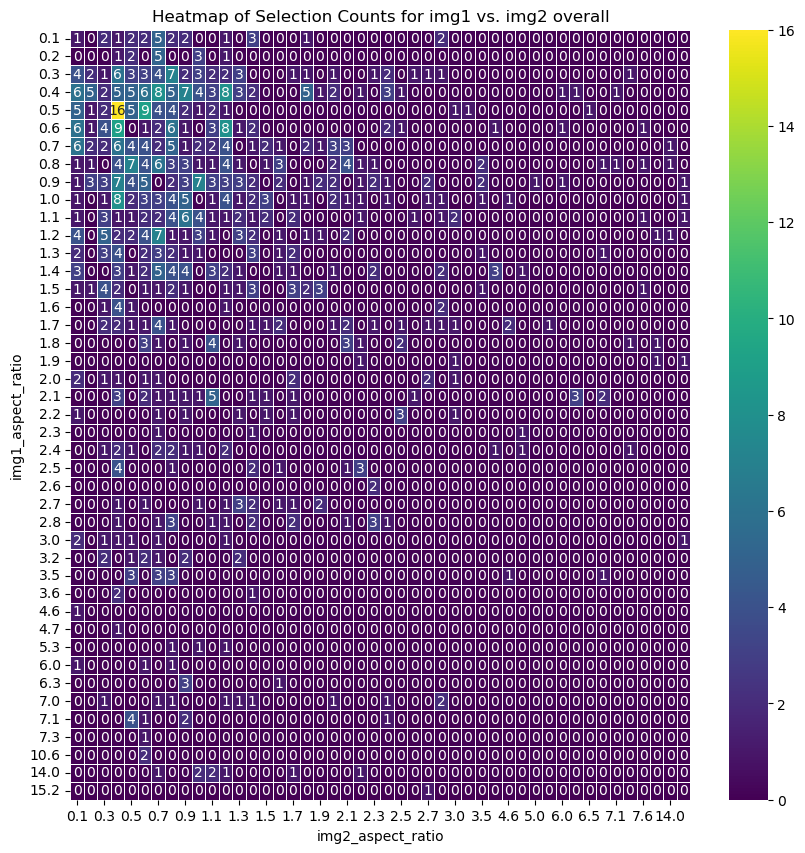

In [39]:
import seaborn as sns
df_akhil = df_8
heatmap_data = df_akhil.pivot_table(index='img_1_aspect_ratio', columns='img_2_aspect_ratio', values='selected_aspect_ratio', aggfunc='count', fill_value=0)

# Create the heatmap using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='d', linewidths=.5)

# Set labels and title
plt.xlabel('img2_aspect_ratio')
plt.ylabel('img1_aspect_ratio')
plt.title('Heatmap of Selection Counts for img1 vs. img2 overall');

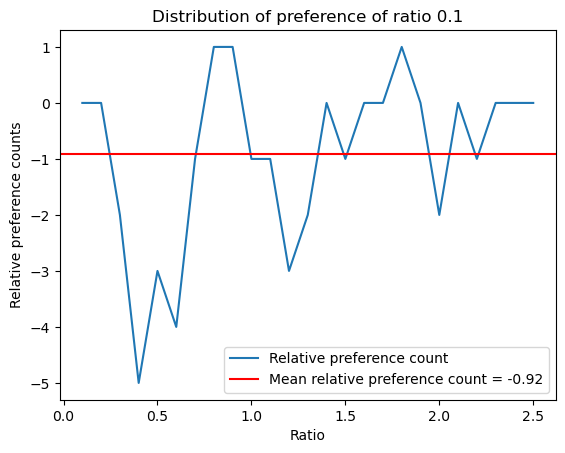

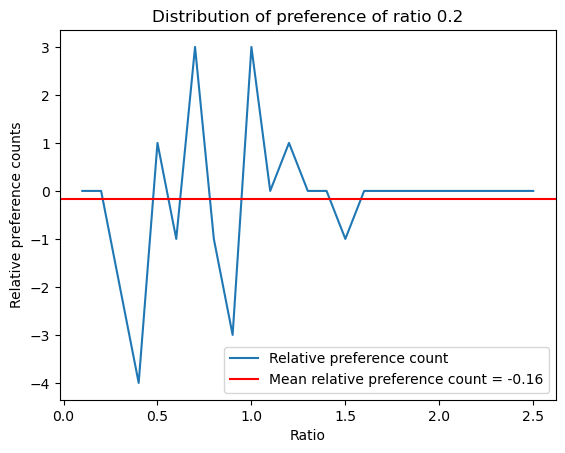

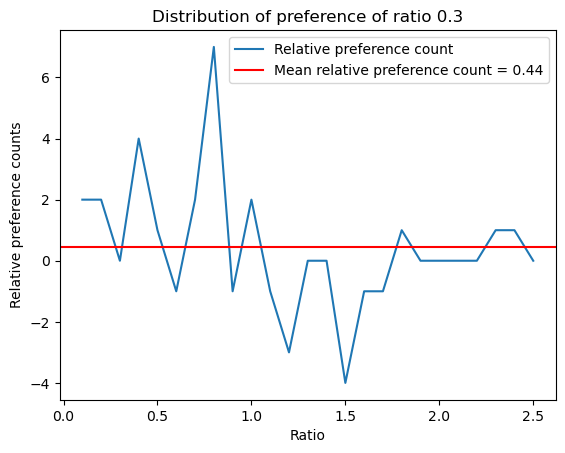

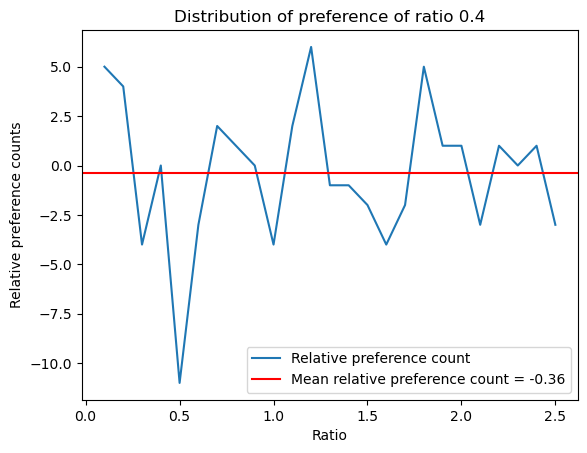

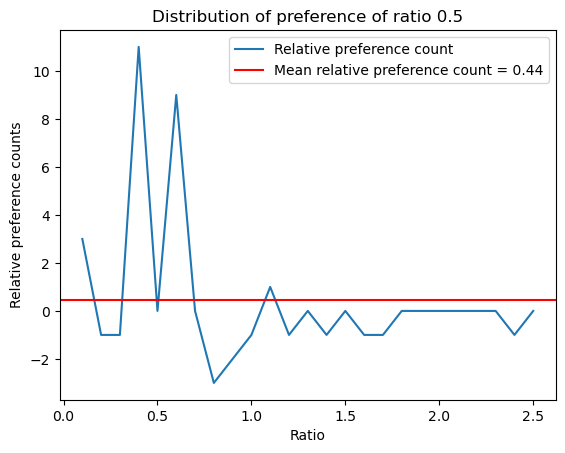

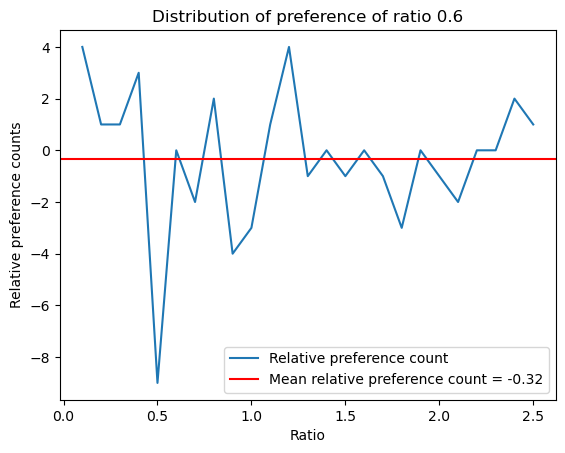

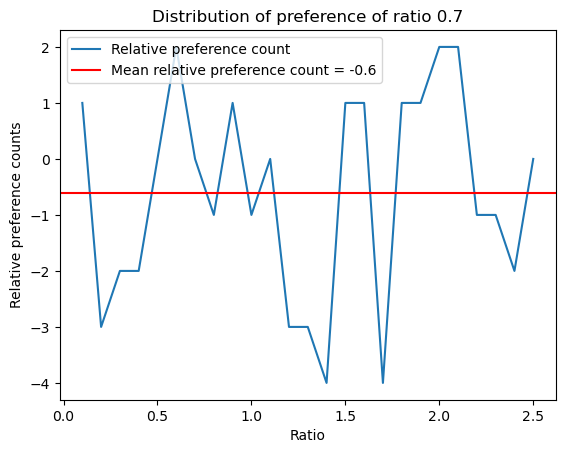

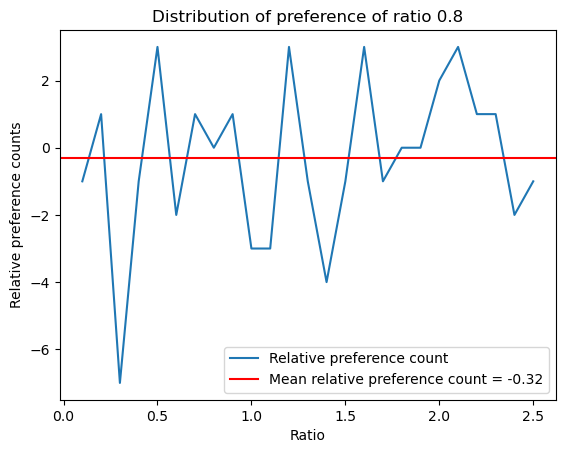

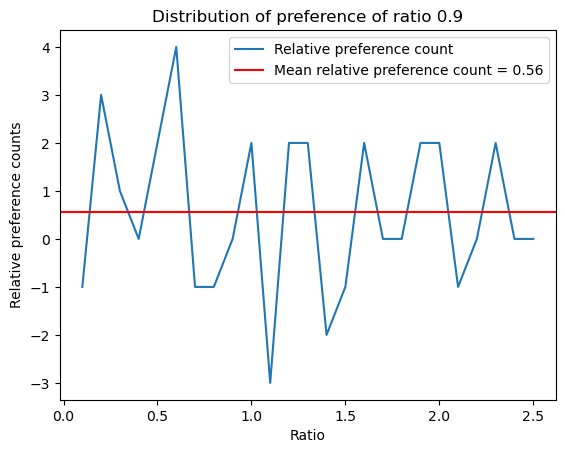

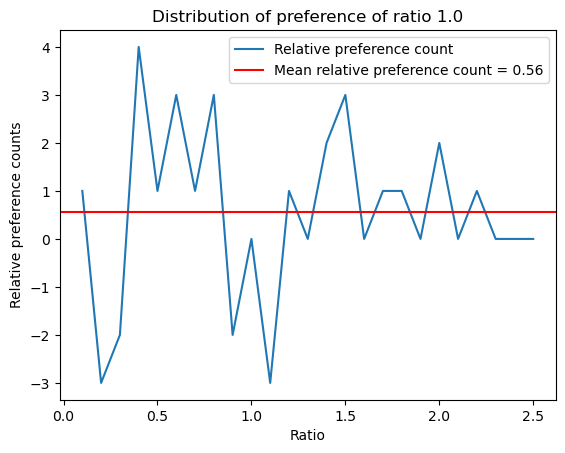

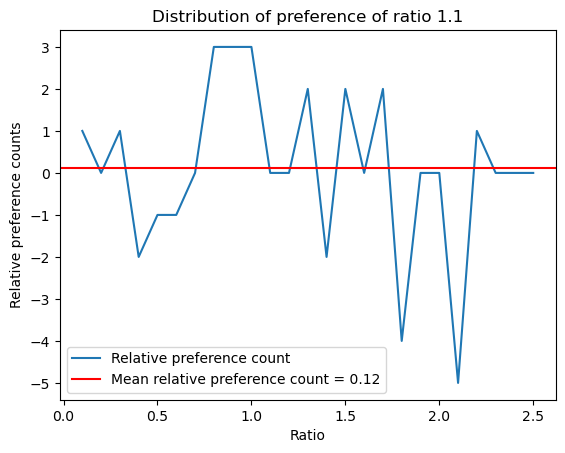

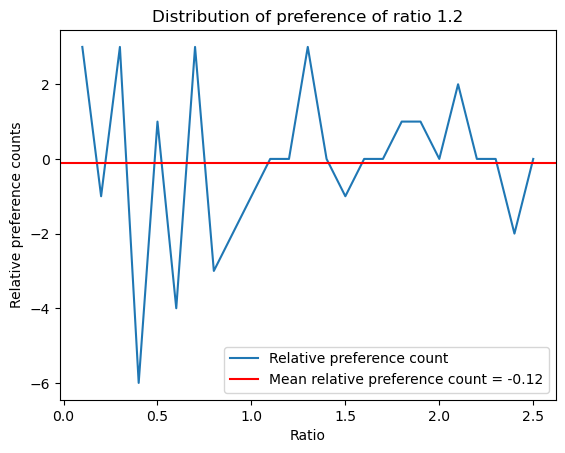

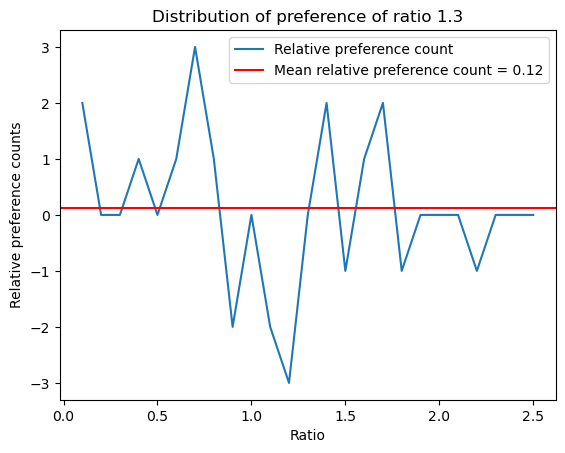

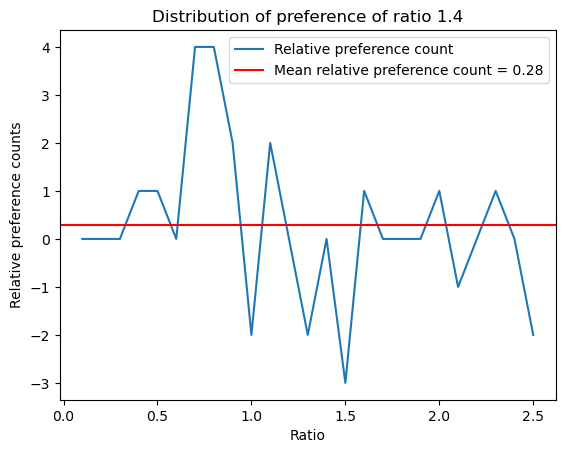

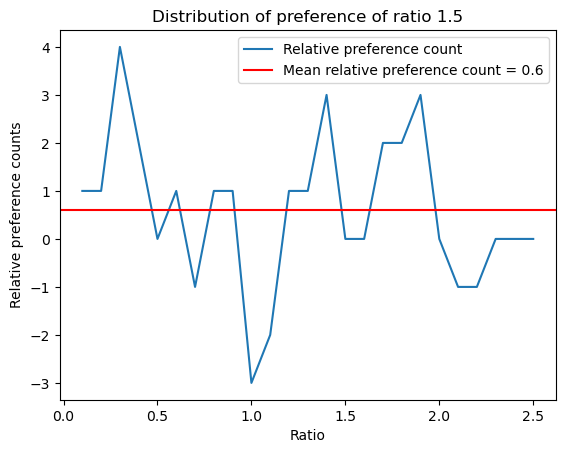

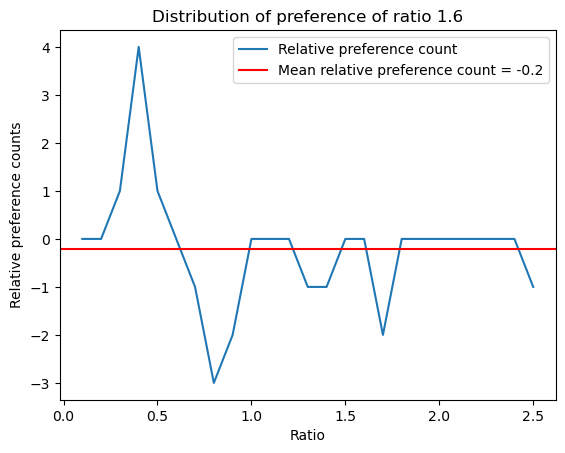

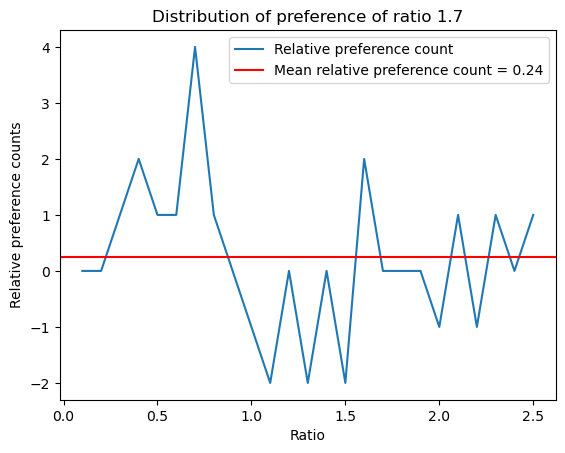

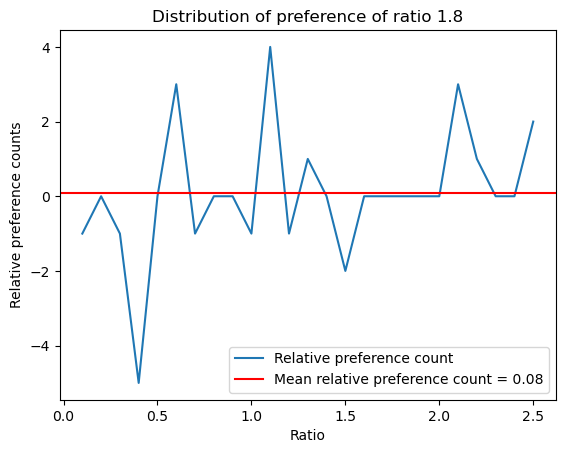

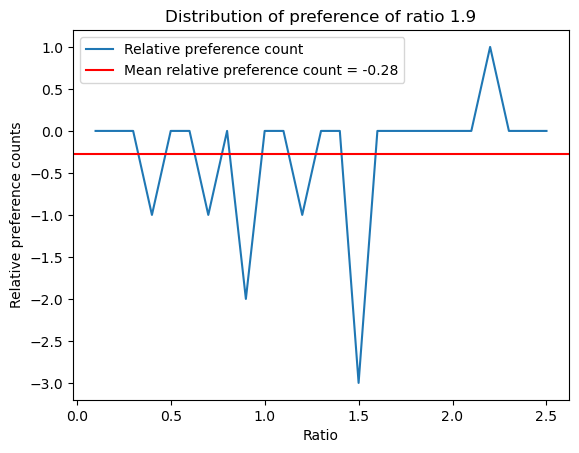

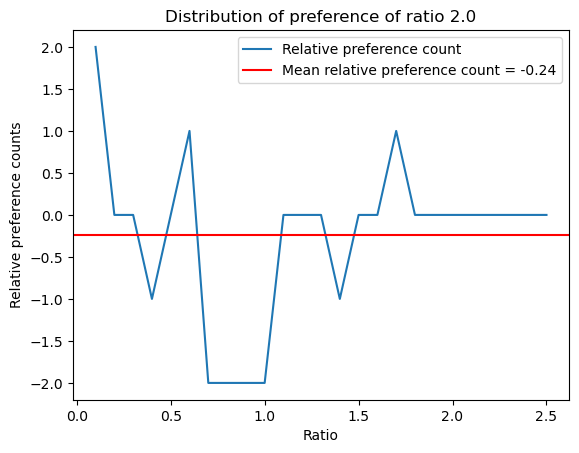

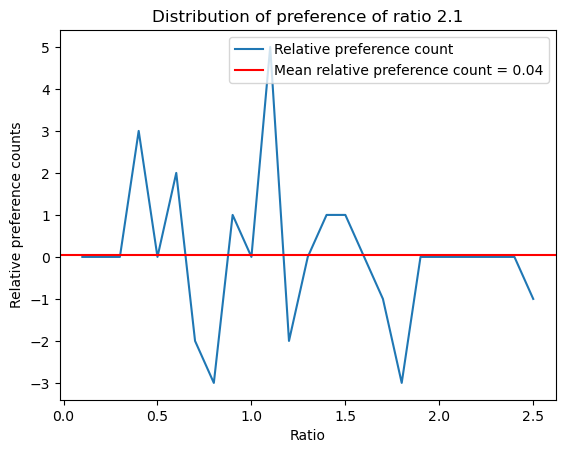

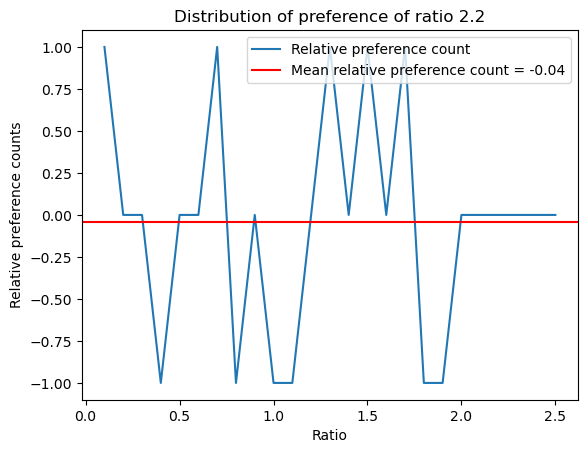

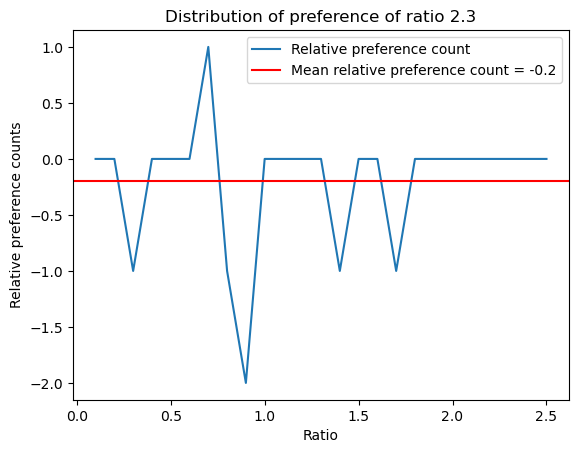

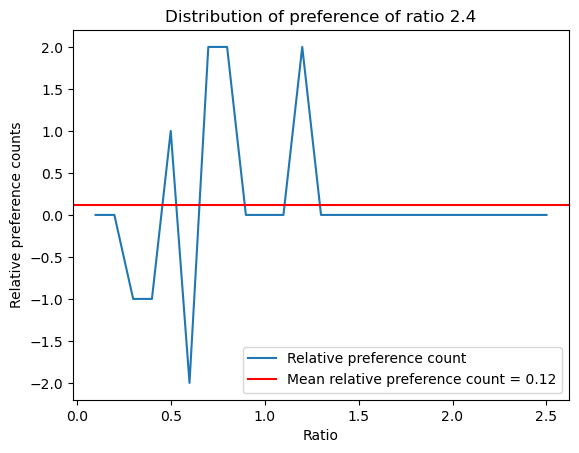

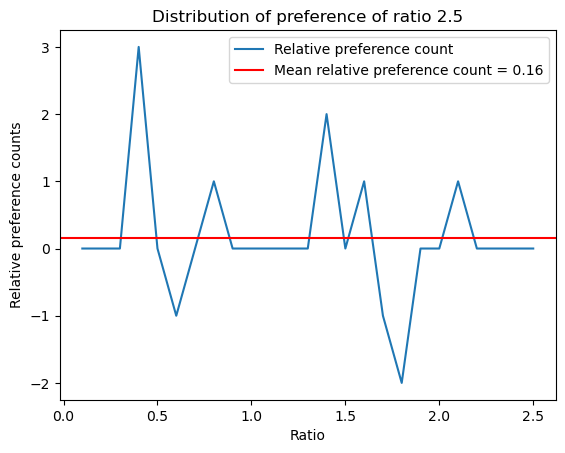

In [40]:
aspect_ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5]
mean_preference = []
for ratio in aspect_ratios:
    row_values = heatmap_data.loc[ratio, :] - heatmap_data.loc[:, ratio]
    row_values = row_values.to_frame()
    row_values = row_values.reset_index()
    row_values
    plt.title("Distribution of preference of ratio "+str(ratio))
    plt.xlabel("Ratio")
    plt.ylabel("Relative preference counts")
    plt.plot(row_values["index"][:25], row_values[ratio][:25], label = "Relative preference count")
    plt.axhline(row_values[ratio][:25].mean(), color = "red", label = "Mean relative preference count = "+str(row_values[ratio][:25].mean()))
    plt.legend()
    plt.savefig("Distribution of preference of ratio "+str(ratio)+".jpg")
    mean_preference.append(row_values[ratio][:25].mean())
    plt.show()
    

In [32]:
mean_preference

[-0.92,
 -0.16,
 0.44,
 -0.36,
 0.44,
 -0.32,
 -0.6,
 -0.32,
 0.56,
 0.56,
 0.12,
 -0.12,
 0.12,
 0.28,
 0.6,
 -0.2,
 0.24,
 0.08,
 -0.28,
 -0.24,
 0.04,
 -0.04,
 -0.2,
 0.12,
 0.16]

In [33]:
row_values = heatmap_data.loc[0.5, :] - heatmap_data.loc[:, 0.5]
row_values = row_values.to_frame()
list(row_values[0.5][:25])

[3.0,
 -1.0,
 -1.0,
 11.0,
 0.0,
 9.0,
 0.0,
 -3.0,
 -2.0,
 -1.0,
 1.0,
 -1.0,
 0.0,
 -1.0,
 0.0,
 -1.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -3.0,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 -4.0,
 0.0,
 nan,
 0.0,
 0.0,
 0.0]

In [88]:
heatmap_data

img_2_aspect_ratio  0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   \
img_1_aspect_ratio                                                         
0.1                    1     0     2     1     2     2     5     2     2   
0.2                    0     0     0     1     2     0     5     0     0   
0.3                    4     2     1     6     3     3     4     7     2   
0.4                    6     5     2     5     5     6     8     5     7   
0.5                    5     1     2    16     5     9     4     4     2   
0.6                    6     1     4     9     0     1     2     6     1   
0.7                    6     2     2     6     4     4     2     5     1   
0.8                    1     1     0     4     7     4     6     3     3   
0.9                    1     3     3     7     4     5     0     2     3   
1.0                    1     0     1     8     2     3     3     4     5   
1.1                    1     0     3     1     1     2     2     4     6   
1.2                    4     0     5     2     2     4     7     1     1   
1.3                    2     0     3     4     0     2     3     2     1   
1.4                    3     0     0     3     1     2     5     4     4   
1.5                    1     1     4     2     0     1     1     2     1   
1.6                    0     0     1     4     1     0     0     0     0   
1.7                    0     0     2     2     1     1     4     1     0   
1.8                    0     0     0     0     0     3     1     0     1   
1.9                    0     0     0     0     0     0     0     0     0   
2.0                    2     0     1     1     0     1     1     0     0   
2.1                    0     0     0     3     0     2     1     1     1   
2.2                    1     0     0     0     0     0     1     0     1   
2.3                    0     0     0     0     0     0     1     0     0   
2.4                    0     0     1     2     1     0     2     2     1   
2.5                    0     0     0     4     0     0     0     1     0   
2.6                    0     0     0     0     0     0     0     0     0   
2.7                    0     0     0     1     0     1     0     0     0   
2.8                    0     0     0     1     0     0     1     3     0   
3.0                    2     0     1     1     1     0     1     0     0   
3.2                    0     0     2     0     1     2     1     0     2   
3.5                    0     0     0     0     3     0     3     3     0   
3.6                    0     0     0     2     0     0     0     0     0   
4.6                    1     0     0     0     0     0     0     0     0   
4.7                    0     0     0     1     0     0     0     0     0   
5.3                    0     0     0     0     0     0     0     1     0   
6.0                    1     0     0     0     0     1     0     1     0   
6.3                    0     0     0     0     0     0     0     0     3   
7.0                    0     0     1     0     0     0     1     1     0   
7.1                    0     0     0     0     4     1     0     0     2   
7.3                    0     0     0     0     0     1     0     0     0   
10.6                   0     0     0     0     0     2     0     0     0   
14.0                   0     0     0     0     0     0     1     0     0   
15.2                   0     0     0     0     0     0     0     0     0   

img_2_aspect_ratio  1.0   ...  6.0   6.3   6.5   7.0   7.1   7.3   7.6   10.6  \
img_1_aspect_ratio        ...                                                   
0.1                    0  ...     0     0     0     0     0     0     0     0   
0.2                    3  ...     0     0     0     0     0     0     0     0   
0.3                    3  ...     0     0     0     0     0     1     0     0   
0.4                    4  ...     1     1     0     0     1     0     0     0   
0.5                    1  ...     0     0     1     0     0     0     0     0   
0.6         

In [ ]:
df_akhil = df_8[df_8["email"] == "rajatbhandary19@gmail.com"]

In [30]:
df_8.groupby("image_class")["selected_aspect_ratio"].count()

image_class
1      91
10     90
2     165
3     104
4      82
5      86
6      61
7      61
8      80
9      91
Name: selected_aspect_ratio, dtype: int64

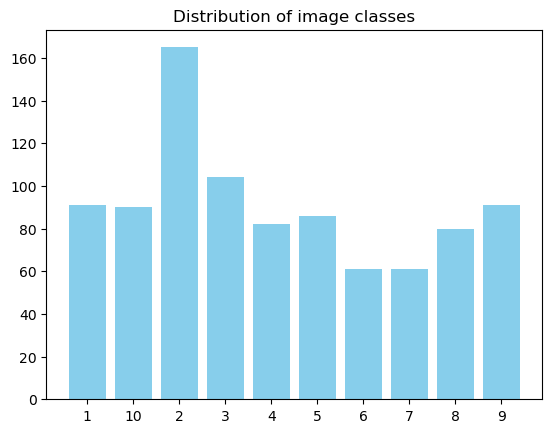

In [41]:
final_df = df_8.groupby("image_class").size().reset_index(name='count')
final_df = final_df.sort_values(by='image_class')

# Plot histogram
plt.title("Distribution of image classes")
plt.bar(final_df['image_class'], final_df['count'], color='skyblue');

In [37]:
df_11 = df_10.sort_values(by = "image_class")
final_df = df_11.groupby("image_class").size().reset_index(name='count')
final_df["image_class"] = final_df["image_class"].sort_values()
final_df

NameError: name 'df_10' is not defined

In [34]:
len(df_10["email"].unique())

46

In [143]:
un_sess_id = df["session_id"].unique()
un_sess_id

array(['LKF392RY0M', 'YCMIWQSPY6', '0LERVOD0ZM', 'RWU5JFC20W',
       '4E4PF1A3XG', 'EGMJW8OUVQ', 'IS58SS456E', '8DIEUMD5EV',
       'QPW4YDQAGC', 'Q6MQRX1RNT', 'BZ1O7OEFHS', '1F7OZTCS9T',
       'F1W89X6TGI', 'OUPOGS96NF', '1NVVCPJ95Y', '2GEUDDUZ3B',
       '4LP8A3AA2N', 'NC5CSKZB43', 'HXHLXKMQQ5', 'I7GDYVYU1M',
       'TJUQ2B3RSZ', 'XFAACO7VOT', 'VQHY25UKAZ', 'SBZL56PFXP',
       '2FLZ91227I', 'TV9G54HR9C', 'PEVO3LW2W9', 'OKXXXWRZR8',
       'ZGZATM6B6V', '14QJ7EJWTT', 'FAA1NU1071', '5WILKLOQMJ',
       'N158ANZIKD', 'WYU2HNLE5G', '2BNNQ0TGLS', 'OD55712TKR',
       'IZX6TFQPQL', '5JMR2CCANG', 'J4J5DA5VZY', '6YDFF274ZU',
       '8YXZPKJ84M', '4K1PHGYRDQ', 'KKG1DVG97X', '8VN9AVC1VE',
       'GGGI3FCH83', 'JHECHAGBDL', '488USXA74M', 'AEFCKHU60H'],
      dtype=object)

In [144]:
un_sess_id_2 = df_7["session_id"].unique()
un_sess_id_2

array(['L13Q31O33Q', 'IH5857WO0J', 'N23E74XJ7D', 'R50XY7VY81',
       'IQR0M4STCK', '8YQZDKLUQF', 'ZFVAZ7JZLM', 'DCVTR81BA2',
       'KZBDKHN3SU', 'C4JJ8O0W6V', 'R8ZN9IQXSL', 'CPUD0QHYYP',
       '5IFJ2IGY7X', 'K1ND0IE7LF', 'ZPY119ZNTO', '4TRODWZOZY',
       'A9UOK68692', '8097Y36TDX', '795FCP6UQZ', 'RRQ1MJHB9D',
       'E6ZWU3E6XR', 'R99C139L4T', 'W92E1W3C6G', 'V7DJDI6VHG',
       'WMZ380QR2Q', '6O9ZSJS8RE', 'XSFKDDONLF', '6FSYY56VEF',
       'ST2RAGGNZ5', 'RHXUYFWO9B', 'NGSA8BRR28', 'CUYPD5OHFA',
       'MW0XTJK5Y0', 'A9NIDFJ2PW', '7L9FZ7P9SJ', 'W3J2D7JEPF',
       'O4T0ME8DCP', 'PD8E9EDFIK', 'HRFBGY1GQ9', 'TNQCY1LSY7',
       'Z6YHT4VCGF', 'PAZ4PB3GRN', 'I8GJMDSQD5', 'HH66MV62VZ',
       'E6BR0G222P', 'RXW3O0J85I', 'XEEPX5QALX', '5H9A057HWG',
       'ZYTT9RO9I6', 'KI3US081F6', '6201K0R70Y', 'TDYMEAGUXC',
       'LOV6KH7Z80', 'TAQ0U587II', 'DRFBMJLHFL', 'TIU48P1A24',
       'GVTOM7S8JA', 'P2SXE6KLDY', 'MRXISUAS14', '759DQN1HLL',
       'HD8J2PPBZL', 'NA4K5ZI386', 'FOHXAQOZJR', '0G80L

In [145]:
intersection_result = list(set(un_sess_id) & set(un_sess_id_2))
intersection_result

[]

In [36]:
df_akhil

index   user_id  session_id  img1  img2 first_img_class  selection  \
0      143  <User 5>  KZBDKHN3SU   105   113               2        105   
1      144  <User 5>  KZBDKHN3SU   107   106               2        106   
2      223  <User 5>  5IFJ2IGY7X   118   101               2        101   
3      402  <User 5>  W92E1W3C6G   323   356               8        323   
4      469  <User 5>  XSFKDDONLF   241   272               6        272   
..     ...       ...         ...   ...   ...             ...        ...   
906   3552  <User 7>  AEFCKHU60H   326   346               8        346   
907   3553  <User 7>  AEFCKHU60H   330   346               8        330   
908   3557  <User 7>  AEFCKHU60H   331   330               8        330   
909   3558  <User 7>  AEFCKHU60H   337   340               8        337   
910   3559  <User 7>  AEFCKHU60H   338   346               8        346   

     time_taken   h1   w1  ...  first_name age  gender    rod reset_token  \
0      1.608557  350  450  ...          sf  12    male  india        None   
1      0.851762  350   50  ...          sf  12    male  india        None   
2      0.923297  665  250  ...          sf  12    male  india        None   
3      2.361869  280  254  ...          sf  12    male  india        None   
4      0.412087  126  350  ...          sf  12    male  india        None   
..          ...  ...  ...  ...         ...  ..     ...    ...         ...   
906    2.588444  350  101  ...    Arihant   23    male  Delhi         NaN   
907    3.079760  350  203  ...    Arihant   23    male  Delhi         NaN   
908    2.397083  350  228  ...    Arihant   23    male  Delhi         NaN   
909    1.994637  350  330  ...    Arihant   23    male  Delhi         NaN   
910    2.328000  350  355  ...    Arihant   23    male  Delhi         NaN   

    reset_token_expires selected_aspect_ratio img_1_aspect_ratio  \
0                  None                   0.8                0.8   
1                  None                   0.7                7.0   
2                  None                   1.0                2.7   
3                  None                   1.1                1.1   
4                  None                   1.0                0.4   
..                  ...                   ...                ...   
906                 NaN                   4.6                3.5   
907                 NaN                   1.7                1.7   
908                 NaN                   1.7                1.5   
909                 NaN                   1.1                1.1   
910                 NaN                   4.6                1.0   

    img_2_aspect_ratio  selection_encoded  
0                  2.0                  1  
1                  0.7                  0  
2                  1.0                  0  
3                  0.3                  1  
4                  1.0                  0  
..                 ...                ...  
906                4.6                  0  
907                4.6                  1  
908                1.7                  0  
909                0.9                  1  
910                4.6                  0  

[911 rows x 28 columns]

In [37]:
aspect_ratios

[0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5]

In [38]:
mean_preference

[-0.92,
 -0.16,
 0.44,
 -0.36,
 0.44,
 -0.32,
 -0.6,
 -0.32,
 0.56,
 0.56,
 0.12,
 -0.12,
 0.12,
 0.28,
 0.6,
 -0.2,
 0.24,
 0.08,
 -0.28,
 -0.24,
 0.04,
 -0.04,
 -0.2,
 0.12,
 0.16]

In [42]:
df_akhil["mean_preference_score"] = ""
for i in range(0, len(df_akhil)):
    a_ratio = int((df_akhil["selected_aspect_ratio"][i] * 10) - 1)
    if a_ratio < 24:
        df_akhil["mean_preference_score"][i] = mean_preference[a_ratio]
    else:
        df_akhil["mean_preference_score"][i] = 0

C:\Users\Akhil\AppData\Local\Temp\ipykernel_4628\1392723383.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_akhil["mean_preference_score"][i] = mean_preference[a_ratio]
C:\Users\Akhil\AppData\Local\Temp\ipykernel_4628\1392723383.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_akhil["mean_preference_score"][i] = mean_preference[a_ratio]
C:\Users\Akhil\AppData\Local\Temp\ipykernel_4628\1392723383.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [101]:
new_df = df_akhil[df_akhil['image_class'] == '1']
new_df['time_taken'].astype("float").corr(new_df['mean_preference_score'].astype("float"))

0.08377910747041788

In [32]:
df_akhil.groupby("image_class")["mean_preference_score"].mean()

image_class
1     0.135385
10   -0.053778
2     0.041212
3    -0.075385
4     0.032195
5     -0.03814
6    -0.122623
7     -0.04918
8       0.0915
9     0.136703
Name: mean_preference_score, dtype: object

In [33]:
df_akhil.groupby("gender")["mean_preference_score"].mean()

gender
female    0.002963
male      0.022278
Name: mean_preference_score, dtype: object

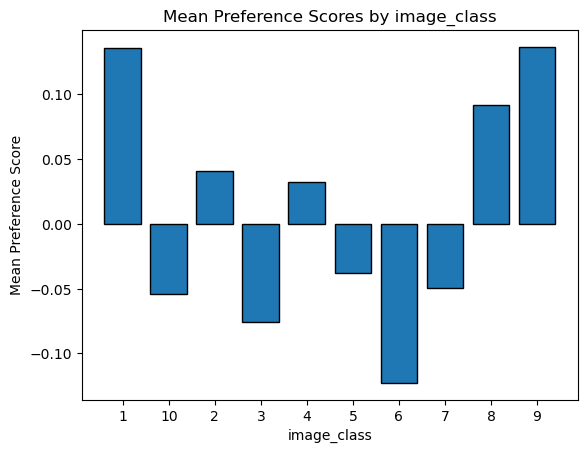

In [43]:
mean_scores = df_akhil.groupby("image_class")["mean_preference_score"].mean()

# Create a bar plot
plt.bar(mean_scores.index, mean_scores, edgecolor='black')
plt.title('Mean Preference Scores by image_class')
plt.xlabel('image_class')
plt.ylabel('Mean Preference Score')
plt.show()

In [44]:
conn = sqlite3.connect(
    "img_db", check_same_thread=False)

cur = conn.cursor()

In [45]:
df_image = pd.read_sql("select * from aspect_images", con = conn)
#df_image[round(df_image["height"]/df_image["width"], 1) == 0.5]

In [34]:
df_image

img_id                                               link  height  width  \
0         1  https://res.cloudinary.com/drqnkfexf/image/upl...     105    234   
1         2  https://res.cloudinary.com/drqnkfexf/image/upl...     140    234   
2         3  https://res.cloudinary.com/drqnkfexf/image/upl...     175    234   
3         4  https://res.cloudinary.com/drqnkfexf/image/upl...     210    234   
4         5  https://res.cloudinary.com/drqnkfexf/image/upl...     245    234   
..      ...                                                ...     ...    ...   
392     393  https://res.cloudinary.com/drqnkfexf/image/upl...     421    350   
393     394  https://res.cloudinary.com/drqnkfexf/image/upl...      44    350   
394     395  https://res.cloudinary.com/drqnkfexf/image/upl...     443    350   
395     396  https://res.cloudinary.com/drqnkfexf/image/upl...      66    350   
396     397  https://res.cloudinary.com/drqnkfexf/image/upl...      88    350   

    image_class  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
392           9  
393           9  
394           9  
395           9  
396           9  

[397 rows x 5 columns]

In [35]:
import requests
import cv2
from skimage import io
import matplotlib.pyplot as plt

url = df_image["link"][62]
image = io.imread(url) 

In [40]:
icacls dataset\train\tower\.ipynb_checkpoints /grant Akhil:F


'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [57]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
from sklearn.model_selection import train_test_split
import os

# Define the root directory of your dataset
dataset_root = 'dataset'

# Function to get file paths and labels from a directory
def get_file_paths_and_labels(directory):
    file_paths = []
    labels = []
    for class_label, class_name in enumerate(os.listdir(directory)):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            for file_name in os.listdir(class_dir):
                file_path = os.path.join(class_dir, file_name)
                file_paths.append(file_path)
                labels.append(class_label)
    return file_paths, labels

# Get file paths and labels for training and testing sets
train_dir = os.path.join(dataset_root, 'train')
test_dir = os.path.join(dataset_root, 'test')

train_file_paths, train_labels = get_file_paths_and_labels(train_dir)
test_file_paths, test_labels = get_file_paths_and_labels(test_dir)

# Data preprocessing and loading
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

class TempleFeatureDataset(Dataset):
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        img_path = self.file_paths[idx]
        img = Image.open(img_path).convert('RGB')

        if self.transform:
            img = self.transform(img)

        # Convert labels to torch.Tensor
        label = torch.tensor(self.labels[idx], dtype=torch.float32)
        
        return img, label

# Modify the labels to be lists of three elements (0 or 1)
labels = [
    [1, 0, 0] if 'dome' in path else [0, 1, 0] if 'column' in path else [0, 0, 1]
    for path in train_file_paths
]

# Split the dataset into training and testing sets
train_paths, test_paths, train_labels, test_labels = train_test_split(
    train_file_paths, labels, test_size=0.2, random_state=42
)

# Use the updated dataset class
train_dataset = TempleFeatureDataset(train_paths, train_labels, transform=data_transform)
test_dataset = TempleFeatureDataset(test_paths, test_labels, transform=data_transform)

# Instantiate the model, loss function, and optimizer
class FeatureDetectionNet(nn.Module):
    def __init__(self):
        super(FeatureDetectionNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc = nn.Linear(64 * 28 * 28, 3)  # 3 output units for three features

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.pool3(x)
        x = x.view(-1, 64 * 28 * 28)
        x = self.fc(x)
        return x

model = FeatureDetectionNet()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for inputs, labels in DataLoader(train_dataset, batch_size=16, shuffle=True):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    # Print training loss for each epoch
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}')

# Evaluation on the test set
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in DataLoader(test_dataset, batch_size=16, shuffle=False):
        outputs = model(inputs)
        predicted = (torch.sigmoid(outputs) > 0.5).float()  # Convert to 0 or 1
        total += 16

        # Count the number of correct predictions for each feature
        for i in range(0, len(predicted)):
            if predicted[i][0] == labels[i][0] and predicted[i][1] == labels[i][1] and predicted[i][2] == labels[i][2]:
                correct += 1

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Epoch 1/10, Loss: 0.5308003425598145
Epoch 2/10, Loss: 0.40532389283180237
Epoch 3/10, Loss: 0.6349992156028748
Epoch 4/10, Loss: 0.07459639012813568
Epoch 5/10, Loss: 0.23387497663497925
Epoch 6/10, Loss: 0.1257510483264923
Epoch 7/10, Loss: 0.5351336598396301
Epoch 8/10, Loss: 0.0018783598206937313
Epoch 9/10, Loss: 0.010878372006118298
Epoch 10/10, Loss: 0.030907833948731422
Test Accuracy: 65.87%


In [58]:
data_transform_2 = transforms.Compose([
    transforms.ToPILImage(),  # Convert NumPy array to PIL Image
    transforms.Resize((224, 224)),  # Resize the image
    transforms.ToTensor(),  # Convert to PyTorch tensor
])

# Apply the transformations to the image
#transformed_image = data_transform_2(image)

In [49]:
outputs = model(transformed_image)
predicted = (torch.sigmoid(outputs) > 0.5).float()
predicted

tensor([[1., 0., 0.]])

In [59]:
import requests
import cv2
from skimage import io
import matplotlib.pyplot as plt

predicted_class = []
for i in range(0, len(df_image)):
    url = df_image["link"][i]
    image = io.imread(url) 
    transformed_image = data_transform_2(image)
    outputs = model(transformed_image)
    predicted = (torch.sigmoid(outputs) > 0.5).float()
    print(i)
    predicted_class.append(predicted)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [49]:
df_akhil

index   user_id  session_id  img1  img2 first_img_class  selection  \
0      143  <User 5>  KZBDKHN3SU   105   113               2        105   
1      144  <User 5>  KZBDKHN3SU   107   106               2        106   
2      223  <User 5>  5IFJ2IGY7X   118   101               2        101   
3      402  <User 5>  W92E1W3C6G   323   356               8        323   
4      469  <User 5>  XSFKDDONLF   241   272               6        272   
..     ...       ...         ...   ...   ...             ...        ...   
906   3552  <User 7>  AEFCKHU60H   326   346               8        346   
907   3553  <User 7>  AEFCKHU60H   330   346               8        330   
908   3557  <User 7>  AEFCKHU60H   331   330               8        330   
909   3558  <User 7>  AEFCKHU60H   337   340               8        337   
910   3559  <User 7>  AEFCKHU60H   338   346               8        346   

     time_taken   h1   w1  ...  age gender    rod  reset_token  \
0      1.608557  350  450  ...   12   male  india         None   
1      0.851762  350   50  ...   12   male  india         None   
2      0.923297  665  250  ...   12   male  india         None   
3      2.361869  280  254  ...   12   male  india         None   
4      0.412087  126  350  ...   12   male  india         None   
..          ...  ...  ...  ...  ...    ...    ...          ...   
906    2.588444  350  101  ...   23   male  Delhi          NaN   
907    3.079760  350  203  ...   23   male  Delhi          NaN   
908    2.397083  350  228  ...   23   male  Delhi          NaN   
909    1.994637  350  330  ...   23   male  Delhi          NaN   
910    2.328000  350  355  ...   23   male  Delhi          NaN   

    reset_token_expires selected_aspect_ratio img_1_aspect_ratio  \
0                  None                   0.8                0.8   
1                  None                   0.7                7.0   
2                  None                   1.0                2.7   
3                  None                   1.1                1.1   
4                  None                   1.0                0.4   
..                  ...                   ...                ...   
906                 NaN                   4.6                3.5   
907                 NaN                   1.7                1.7   
908                 NaN                   1.7                1.5   
909                 NaN                   1.1                1.1   
910                 NaN                   4.6                1.0   

    img_2_aspect_ratio selection_encoded  mean_preference_score  
0                  2.0                 1                  -0.32  
1                  0.7                 0                   -0.6  
2                  1.0                 0                   0.56  
3                  0.3                 1                   0.12  
4                  1.0                 0                   0.56  
..                 ...               ...                    ...  
906                4.6                 0                      0  
907                4.6                 1                   0.24  
908                1.7                 0                   0.24  
909                0.9                 1                   0.12  
910                4.6                 0                      0  

[911 rows x 29 columns]

In [50]:
predicted_class

[tensor([[1., 0., 0.]]),
 tensor([[1., 0., 0.]]),
 tensor([[1., 0., 0.]]),
 tensor([[1., 0., 0.]]),
 tensor([[1., 0., 0.]]),
 tensor([[1., 0., 0.]]),
 tensor([[1., 1., 0.]]),
 tensor([[1., 0., 0.]]),
 tensor([[0., 1., 0.]]),
 tensor([[1., 1., 0.]]),
 tensor([[1., 1., 0.]]),
 tensor([[1., 1., 0.]]),
 tensor([[1., 1., 0.]]),
 tensor([[1., 0., 0.]]),
 tensor([[1., 1., 0.]]),
 tensor([[1., 1., 0.]]),
 tensor([[0., 1., 0.]]),
 tensor([[0., 1., 0.]]),
 tensor([[0., 0., 0.]]),
 tensor([[0., 0., 0.]]),
 tensor([[0., 0., 0.]]),
 tensor([[0., 0., 0.]]),
 tensor([[0., 0., 0.]]),
 tensor([[0., 0., 0.]]),
 tensor([[1., 0., 0.]]),
 tensor([[1., 0., 0.]]),
 tensor([[1., 0., 0.]]),
 tensor([[1., 1., 0.]]),
 tensor([[0., 1., 0.]]),
 tensor([[0., 1., 0.]]),
 tensor([[0., 1., 0.]]),
 tensor([[0., 1., 0.]]),
 tensor([[0., 1., 0.]]),
 tensor([[0., 1., 0.]]),
 tensor([[0., 1., 0.]]),
 tensor([[0., 1., 0.]]),
 tensor([[0., 1., 0.]]),
 tensor([[0., 1., 0.]]),
 tensor([[1., 0., 0.]]),
 tensor([[0., 1., 0.]]),


In [60]:
df_akhil["Image_features"] = ""
for i in range(0, len(df_akhil)):
    df_akhil["Image_features"][i] = (predicted_class[df_akhil["img_id"][i] - 1].tolist())[0]

C:\Users\Akhil\AppData\Local\Temp\ipykernel_4628\2968747784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_akhil["Image_features"][i] = (predicted_class[df_akhil["img_id"][i] - 1].tolist())[0]
C:\Users\Akhil\AppData\Local\Temp\ipykernel_4628\2968747784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_akhil["Image_features"][i] = (predicted_class[df_akhil["img_id"][i] - 1].tolist())[0]
C:\Users\Akhil\AppData\Local\Temp\ipykernel_4628\2968747784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

In [65]:
df_akhil.columns

Index(['index', 'user_id', 'session_id', 'img1', 'img2', 'first_img_class',
       'selection', 'time_taken', 'h1', 'w1', 'img_id', 'link', 'height',
       'width', 'image_class', 'id', 'email', 'password', 'first_name', 'age',
       'gender', 'rod', 'reset_token', 'reset_token_expires',
       'selected_aspect_ratio', 'img_1_aspect_ratio', 'img_2_aspect_ratio',
       'selection_encoded', 'mean_preference_score', 'Image_features',
       'Image_features_sum'],
      dtype='object')

In [64]:
import scipy.stats as stats

target_lists = [[1, 0, 0], [1, 1, 0], [1, 1, 1], [1, 0, 1]]
target_lists_2 = [[0, 1, 0], [0, 1, 1], [0, 0, 1]]

group_1 = df_akhil[df_akhil["Image_features"].apply(lambda x: x in target_lists)]
group_2 = df_akhil[df_akhil["Image_features"].apply(lambda x: x in target_lists_2)]
statistic, p_value = stats.kruskal(group_1["mean_preference_score"], group_2["mean_preference_score"])

# Display the results
print("Kruskal-Wallis Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between groups.")
else:
    print("Fail to reject the null hypothesis. No significant differences between groups.")

Kruskal-Wallis Statistic: 8.020560167707913
P-value: 0.004624926323476444
Reject the null hypothesis. There are significant differences between groups.


In [67]:
print(group_1["mean_preference_score"].mean(), group_2["mean_preference_score"].mean())

0.015251396648044698 0.11311475409836062


In [68]:
import scipy.stats as stats

target_lists = [[0, 1, 0], [0, 1, 1], [1, 1, 0], [1, 1, 1]]
target_lists_2 = [[1, 0, 0], [1, 0, 1], [0, 0, 1]]


group_1 = df_akhil[df_akhil["Image_features"].apply(lambda x: x in target_lists)]
group_2 = df_akhil[df_akhil["Image_features"].apply(lambda x: x in target_lists_2)]
statistic, p_value = stats.kruskal(group_1["mean_preference_score"], group_2["mean_preference_score"])

# Display the results
print("Kruskal-Wallis Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between groups.")
else:
    print("Fail to reject the null hypothesis. No significant differences between groups.")

Kruskal-Wallis Statistic: 5.502013690174772
P-value: 0.018994588337633424
Reject the null hypothesis. There are significant differences between groups.


In [70]:
print(group_1["mean_preference_score"].mean(), group_2["mean_preference_score"].mean())

0.10056074766355134 0.019097127222982204


In [71]:
import scipy.stats as stats

target_lists = [[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]]
target_lists_2 = [[1, 0, 0], [1, 1, 0], [0, 1, 0]]


group_1 = df_akhil[df_akhil["Image_features"].apply(lambda x: x in target_lists)]
group_2 = df_akhil[df_akhil["Image_features"].apply(lambda x: x in target_lists_2)]
statistic, p_value = stats.kruskal(group_1["mean_preference_score"], group_2["mean_preference_score"])

# Display the results
print("Kruskal-Wallis Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between groups.")
else:
    print("Fail to reject the null hypothesis. No significant differences between groups.")

Kruskal-Wallis Statistic: 2.8755076440761926
P-value: 0.08993661035832029
Fail to reject the null hypothesis. No significant differences between groups.


In [73]:
print(group_1["mean_preference_score"].mean(), group_2["mean_preference_score"].mean())

0.12655737704918033 0.02187902187902183
